# Revenue (ADR) Predictions for Hotels using Machine Learning

1. ARIMA models 
2. Deep Neural Network
3. Sequential Neural Networks

## Dataset

Variable **data2**: Dataset from Kaggle, Look below for more info.



The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020. 

To check more about the dataset, visit the link here: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## 1. ARIMA Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
plt.rcParams['figure.dpi'] = 100

In [2]:
## Kaggle Dataset
data2 = pd.read_csv('hotel_bookings.csv')
data2.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
data2.shape

(119390, 32)

In [4]:
data2.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
target = 'adr'
data2 = data2[[target]]

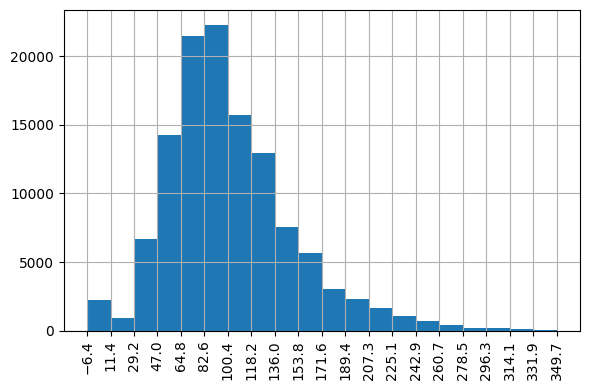

In [6]:
xx = plt.hist(data2[data2<350], bins=20)
plt.xticks(xx[1], rotation=90)
plt.grid()
plt.tight_layout()
plt.savefig("Hist.jpg", dpi=130)
plt.show()

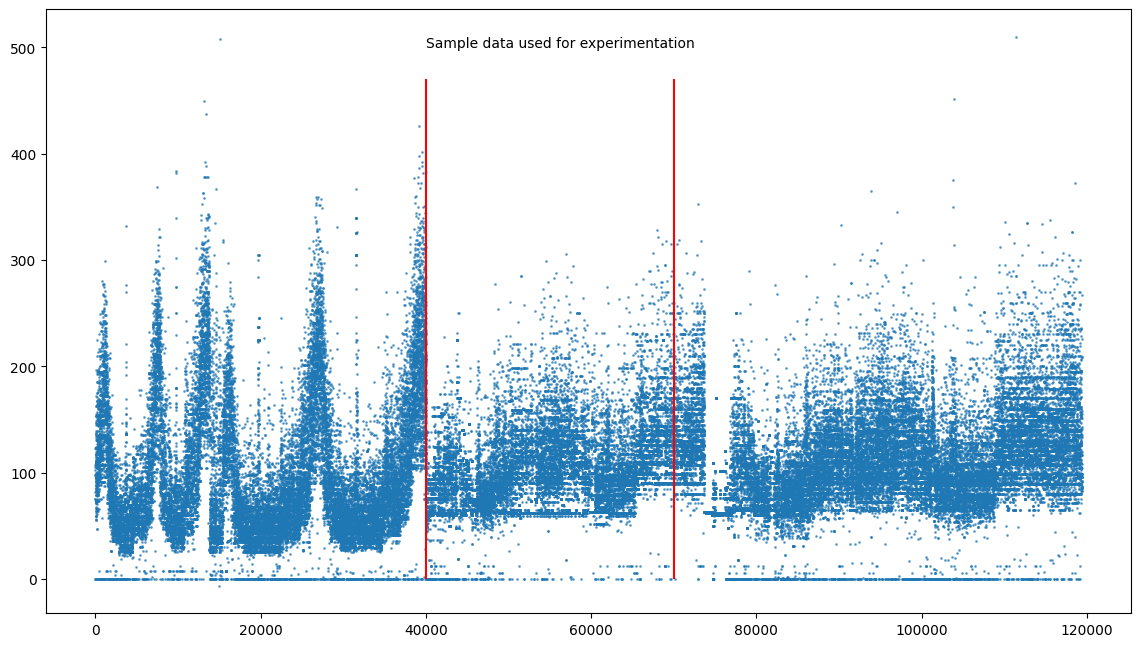

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(range(len(data2[data2.adr<1000]['adr'])),data2[data2.adr<1000]['adr'], s=1, alpha=0.6)
plt.vlines(40000,0, 470, colors='red')
plt.vlines(70000,0, 470, colors='red')
plt.text(40000,500, "Sample data used for experimentation")
plt.savefig("sample_data.jpg", dpi=150)
plt.show()

###  Taking Slice of Data to perform the algorithms and Check if its working!

Slice of the data is taken from inbetween the time series, [40000, 70000)

In [3]:
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
sample_x = range(sample_data.shape[0])
sample_data.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40000  Resort Hotel            0         19               2017   
40001  Resort Hotel            0        229               2017   
40002  Resort Hotel            0         97               2017   
40003  Resort Hotel            0         51               2017   
40004  Resort Hotel            0         64               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40000             August                        35                         29   
40001             August                        35                         27   
40002             August                        35                         27   
40003             August                        35                         31   
40004             August                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40000                        2                     5       2  ...   
40001                        4                     5       2  ...   
40002                        4                     5       2  ...   
40003                        2                     3       2  ...   
40004                        2                     3       2  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
40000    No Deposit   40.0     NaN                    0     Transient  135.00   
40001    No Deposit   40.0     NaN                    0     Transient  131.40   
40002    No Deposit  134.0     NaN                    0     Transient  156.00   
40003    No Deposit   40.0     NaN                    0      Contract  116.50   
40004    No Deposit  241.0     NaN                    0     Transient  187.19   

       required_car_parking_spaces  total_of_special_requests  \
40000                            0                          2   
40001                            0                          0   
40002                            0                          0   
40003                            0                          0   
40004                            0                          1   

       reservation_status reservation_status_date  
40000           Check-Out              2017-09-05  
40001           Check-Out              2017-09-05  
40002           Check-Out              2017-09-05  
40003           Check-Out              2017-09-05  
40004           Check-Out              2017-09-05  

[5 rows x 32 columns]

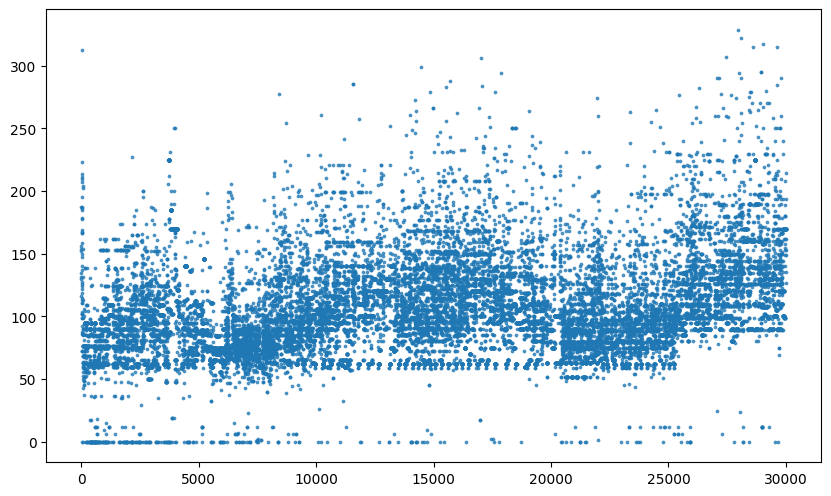

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(sample_x, sample_data.adr, s=3, alpha=0.7)
plt.savefig("sample.jpg", dpi=120)

### Reducing Noise from the Time series data through calculating moving averages (Window size : 7)

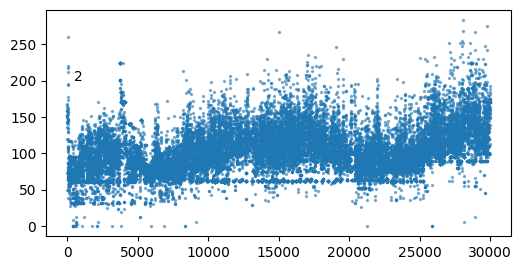

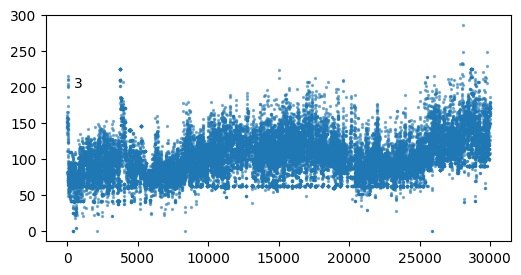

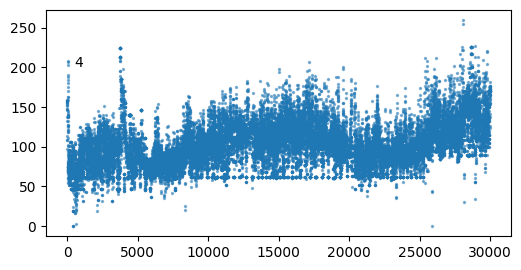

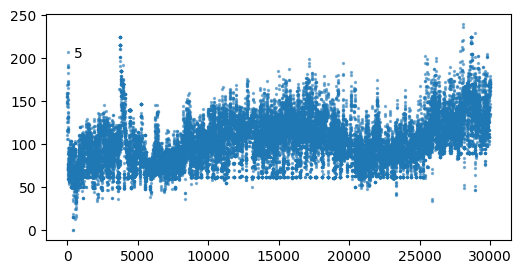

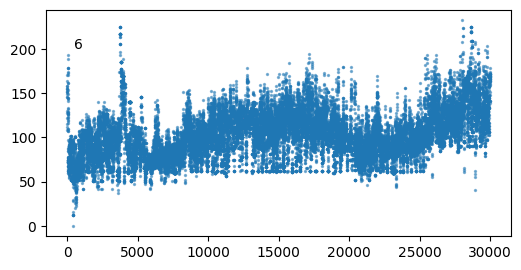

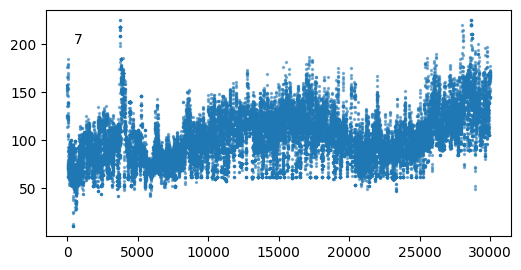

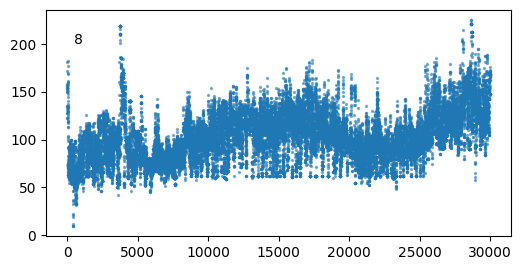

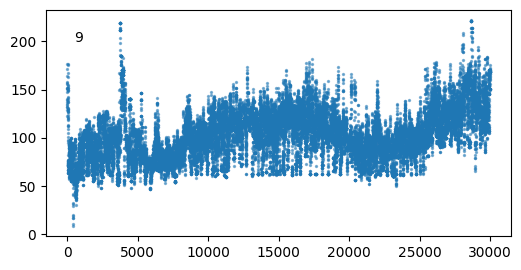

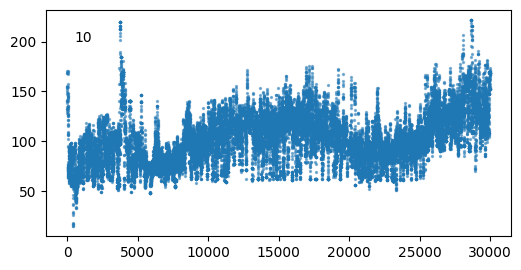

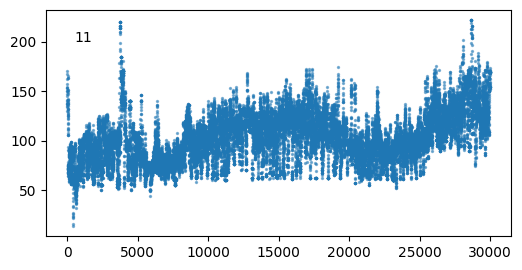

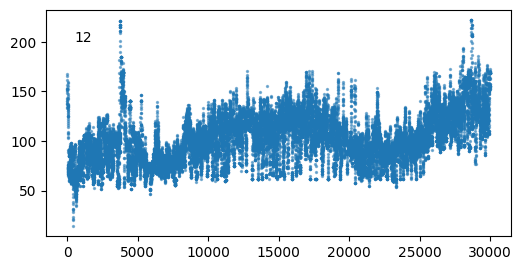

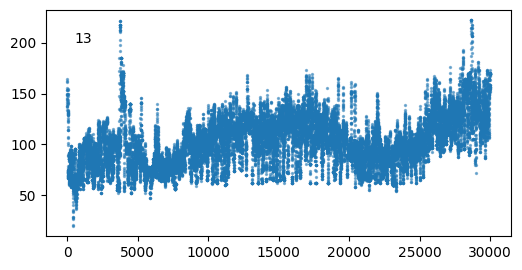

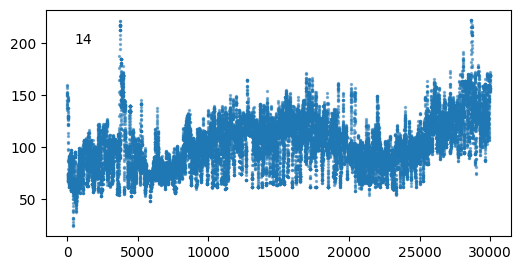

In [42]:
for i in range(2,15):
    mov_avg7 = sample_data.adr.rolling(window=i).mean().iloc[i:]
    mov_avg7 = mov_avg7.reset_index(drop=True)
    plt.figure(figsize=(6,3))
    plt.scatter(range(len(mov_avg7)), mov_avg7, s=2, alpha=0.5)
    plt.text(500,200, str(i))

In [4]:
winsize = 8

In [5]:
mov_avg = sample_data.adr.rolling(window=winsize).mean().iloc[winsize:]

In [6]:
mov_avg = mov_avg.reset_index(drop=True)

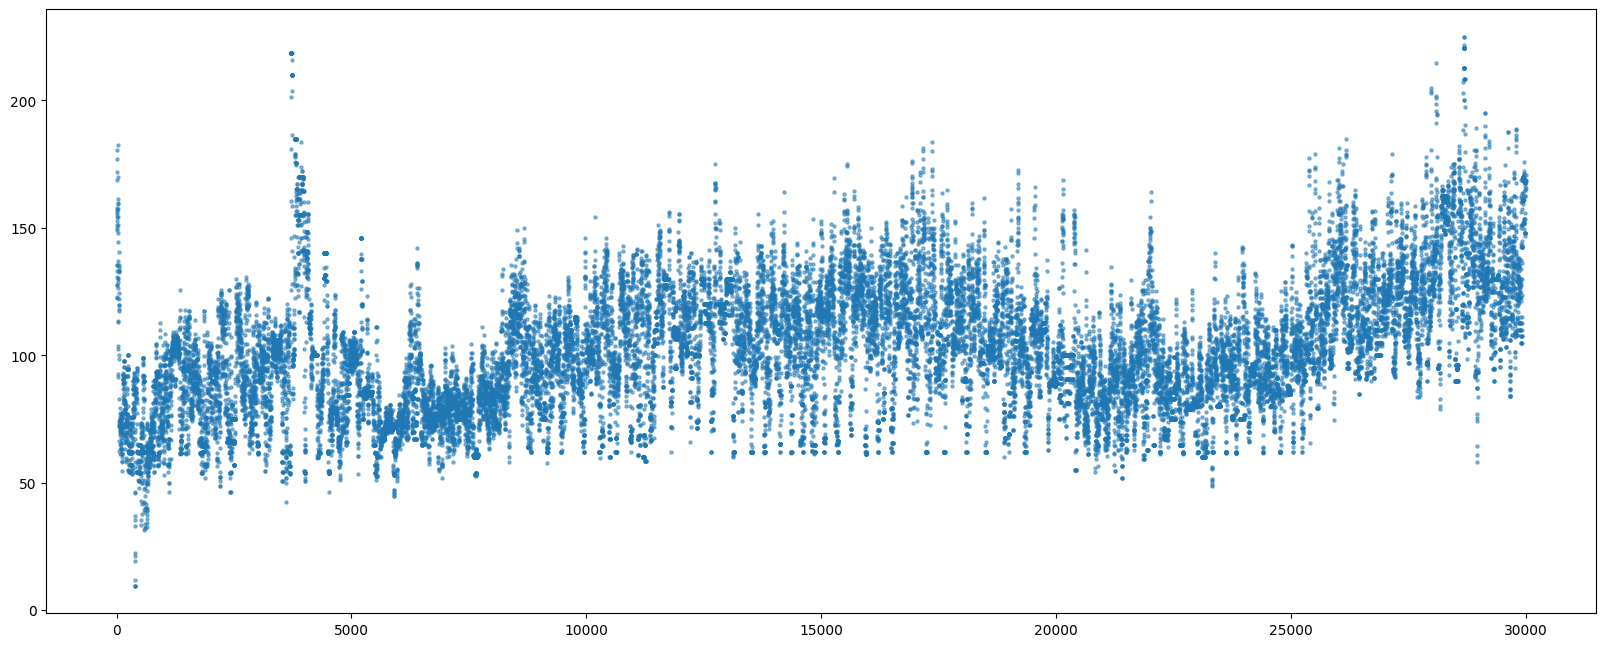

In [7]:
plt.figure(figsize=(20,8))
plt.scatter(range(len(mov_avg)), mov_avg, s=5, alpha=0.5)

In [8]:
model = ARIMA(endog=mov_avg, seasonal_order=(4,1,0,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    adr   No. Observations:                29992
Model:              ARIMA(4, 1, 0, 2)   Log Likelihood              -99669.774
Date:                Fri, 29 Apr 2022   AIC                         199349.548
Time:                        16:59:20   BIC                         199391.092
Sample:                             0   HQIC                        199362.878
                              - 29992                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L2        0.1781      0.004     42.831      0.000       0.170       0.186
ar.S.L4        0.0746      0.004     16.766      0.000       0.066       0.083
ar.S.L6        0.0675      0.005     14.991      0.000       0.059       0.076
ar.S.L8       -0.4348      0.004   -107.132      0.000      -0.443      -0.427
sigma2        45.1022      0.257    175.716      0.000      44.599      45.605
===================================================================================
Ljung-Box (L1) (Q):                9198.45   Jarque-Bera (JB):              5962.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model.save("arima")

In [15]:
import pickle
model = pickle.load(open("arima", 'rb'))

### 30 Days in Future Predictions

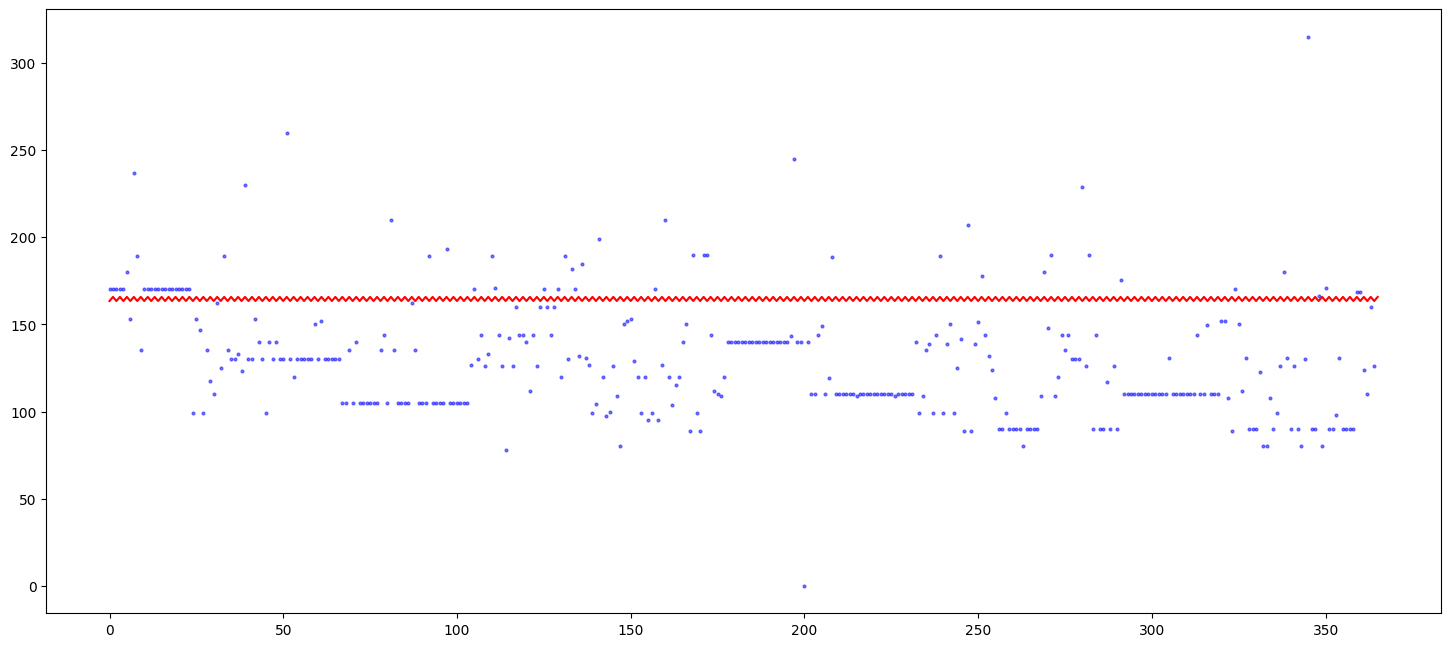

In [16]:
plt.figure(figsize=(18,8))
len_x = len(data2.iloc[70000:70365].adr)
plt.scatter(range(len_x), data2.iloc[70000:70365].adr, s=4, alpha=0.5, c='blue')
plt.plot(range(len_x+1), model.predict(70000, 70365), c='red')

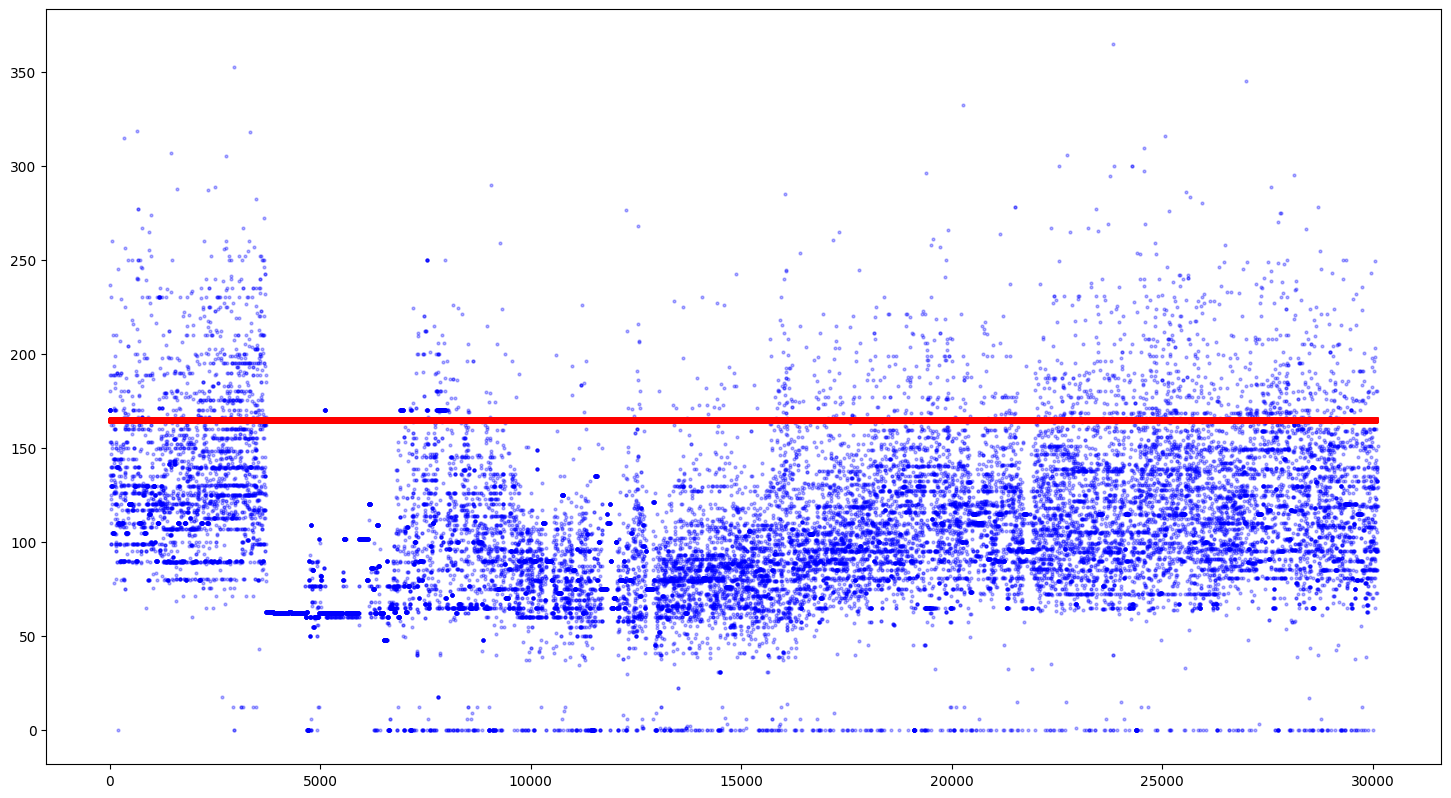

In [39]:
plt.figure(figsize=(18,10))
len_x = len(data2.iloc[70000:100121].adr)
plt.scatter(range(len_x), data2.iloc[70000:100121].adr, s=4, alpha=0.3, c='blue')
plt.plot(range(len_x+1), model.predict(70000, 100121), c='red')

## 2. Deep Neural Networks


### With Subset of the data

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [26]:
data2 = pd.read_csv('hotel_bookings.csv')
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
mov_avg7 = sample_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

del data2
del sample_data

In [27]:
df = mov_avg7
del mov_avg7
df.head()

0    146.821429
1    151.850000
2    149.135714
3    156.292857
4    150.901429
Name: adr, dtype: float64

In [28]:
df = pd.DataFrame(df)
df.describe()

adr
count  29993.000000
mean     102.027937
std       25.617941
min       10.928571
25%       83.377143
50%      100.000000
75%      118.504286
max      225.000000

array([[<AxesSubplot:title={'center':'adr'}>]], dtype=object)

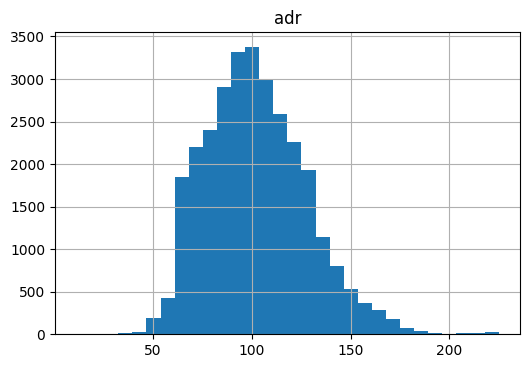

In [29]:
df.hist(bins=30)

<AxesSubplot:>

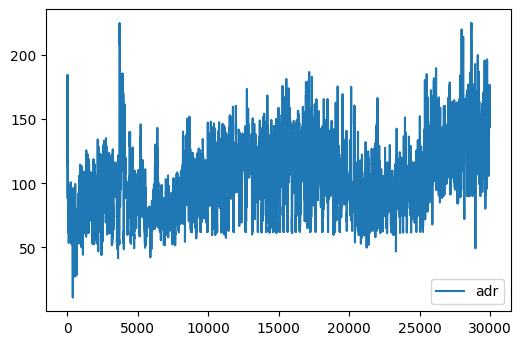

In [30]:
df.plot()

In [31]:
def plot_loss(history):
    epochs = range(1, (len(history.history["loss"])+1))
    losses = history.history["loss"]
    plt.figure(figsize=(8,5))
    plt.plot(epochs, losses)
    plt.title("Loss graph")
    plt.xlabel("epochs")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.show()
    
split = 23000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]


In [32]:
window_size = 7
batch_size = 32

def window_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [33]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/12
719/719 [==============================] - 4s 5ms/step - loss: 104.4446
Epoch 2/12
719/719 [==============================] - 3s 4ms/step - loss: 104.2696 1s - loss: 99.72
Epoch 3/12
719/719 [==============================] - 3s 4ms/step - loss: 103.9482
Epoch 4/12
719/719 [==============================] - 3s 5ms/step - loss: 102.8196
Epoch 5/12
719/719 [==============================] - 3s 4ms/step - loss: 99.7323
Epoch 6/12
719/719 [==============================] - 3s 4ms/step - loss: 85.4885
Epoch 7/12
719/719 [==============================] - 3s 5ms/step - loss: 33.4089
Epoch 8/12
719/719 [==============================] - 3s 4ms/step - loss: 7.8881
Epoch 9/12
719/719 [==============================] - 3s 4ms/step - loss: 7.9005
Epoch 10/12
719/719 [==============================] - 3s 4ms/step - loss: 7.9787A: 0s - loss: 7
Epoch 11/12
719/719 [==============================] - 3s 5ms/step - loss: 8.1231
Epoch 12/12
719/719 [==============================] - 3s 4ms/st

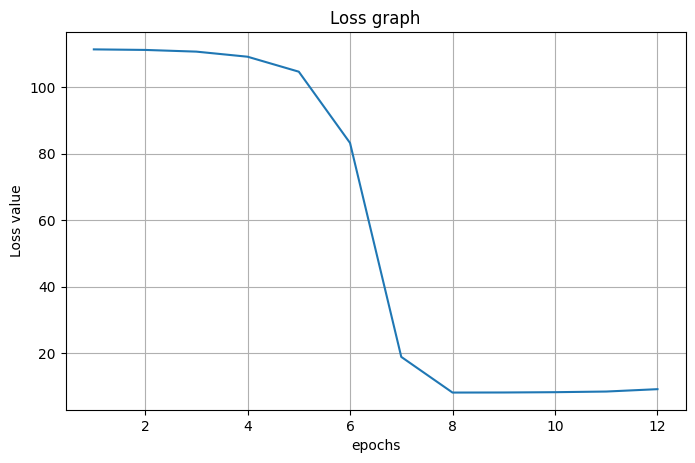

In [34]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-7))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)


(1e-08, 0.1, 5.0, 70.0)

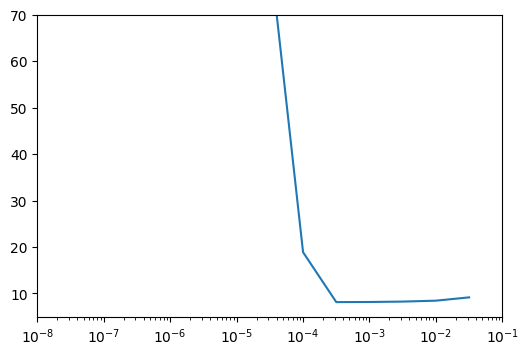

In [35]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,5, 70])

Epoch 1/5
719/719 [==============================] - 4s 5ms/step - loss: 27.4538
Epoch 2/5
719/719 [==============================] - 3s 5ms/step - loss: 7.8852
Epoch 3/5
719/719 [==============================] - 3s 5ms/step - loss: 7.8892
Epoch 4/5
719/719 [==============================] - 3s 5ms/step - loss: 7.8740
Epoch 5/5
719/719 [==============================] - 3s 4ms/step - loss: 7.8288


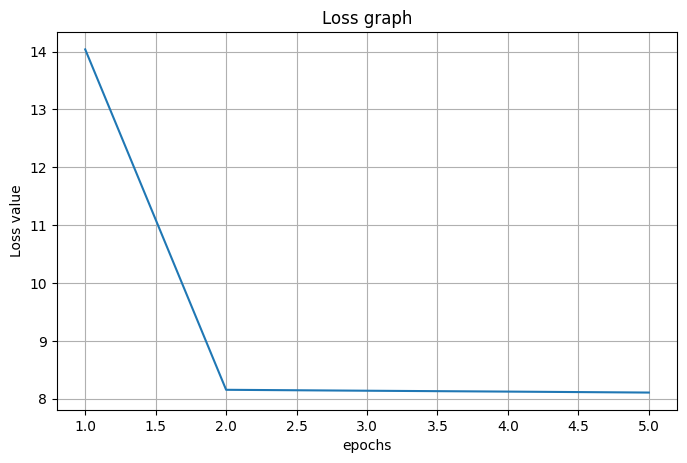

In [36]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/3
719/719 [==============================] - 4s 4ms/step - loss: 7.8316
Epoch 2/3
719/719 [==============================] - 3s 4ms/step - loss: 7.8043
Epoch 3/3
719/719 [==============================] - 3s 5ms/step - loss: 7.8050


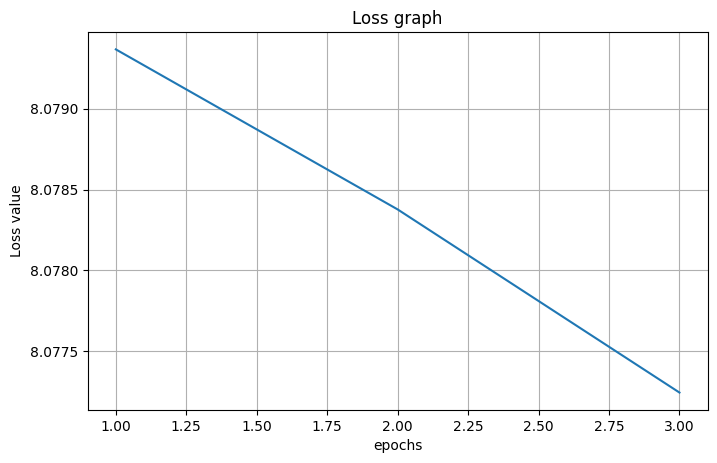

In [38]:
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-5))
history = model.fit(dataset, epochs=3)
plot_loss(history)

[ 60.749138  76.39256   84.915054 ... 113.965775 123.25388  111.51441 ]


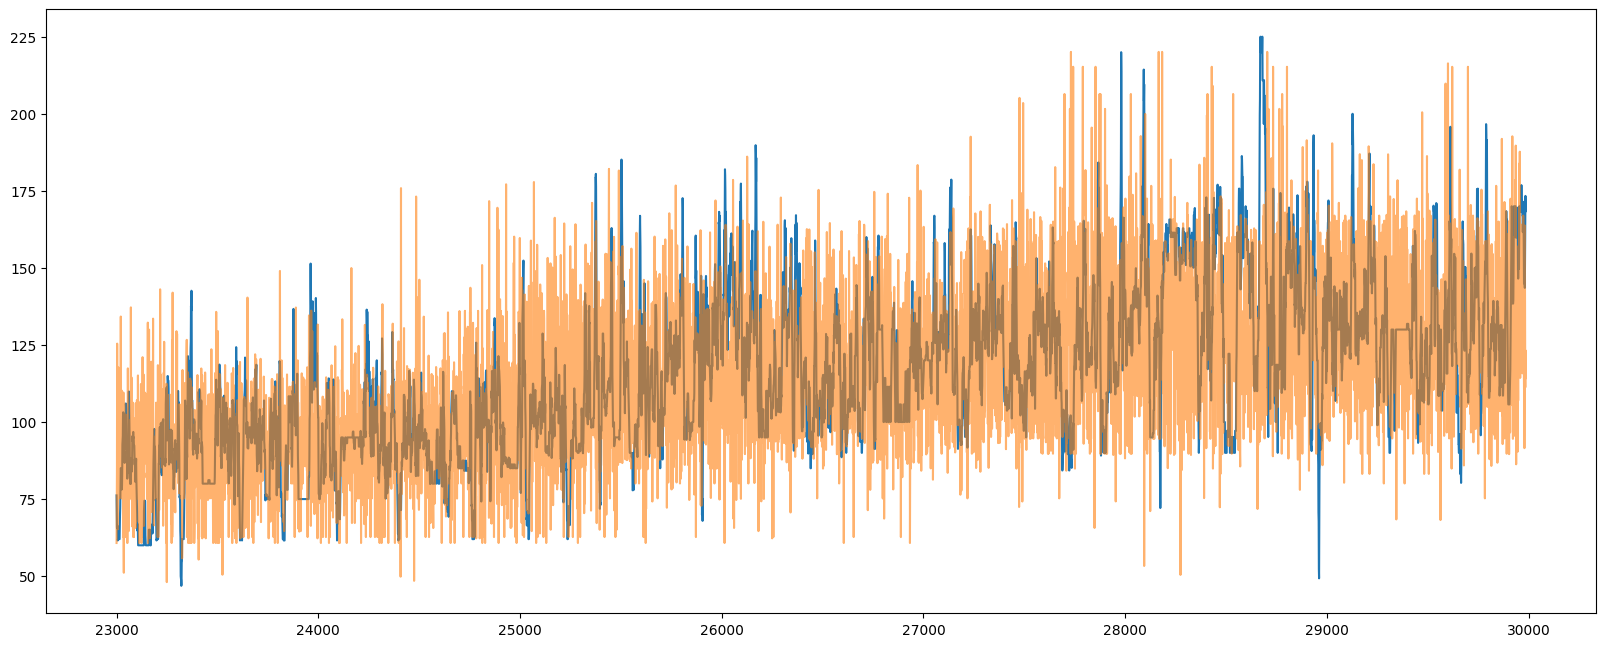

In [39]:
prediction = model.predict(valid_dataset)
print(prediction[:,0,0])

plt.figure(figsize=(20,8))
plt.plot(valid_time[:-7], valid_ADR[:-7])
plt.plot(valid_time[:-7], prediction[:,0,0], alpha=0.6)
plt.show()

In [40]:
pred = pd.Series(prediction[:,0,0])

In [41]:
pred_avg7 = pred.rolling(window=3).mean().iloc[3:]

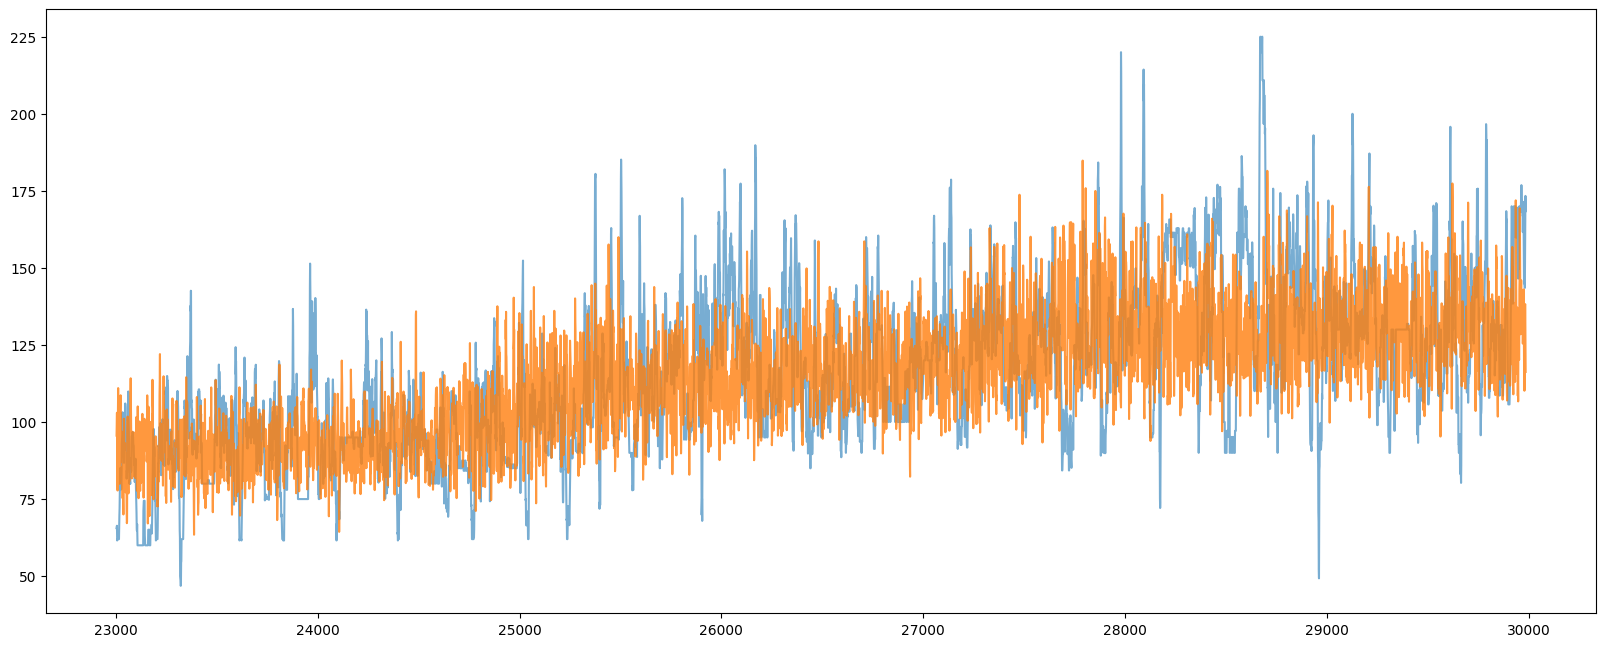

In [42]:
plt.figure(figsize=(20,8))
plt.plot(valid_time[3:-7], valid_ADR[3:-7], alpha=0.6)
plt.plot(valid_time[3:-7], pred_avg7, alpha=0.8)
plt.show()

---

### With complete data

In [44]:
data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

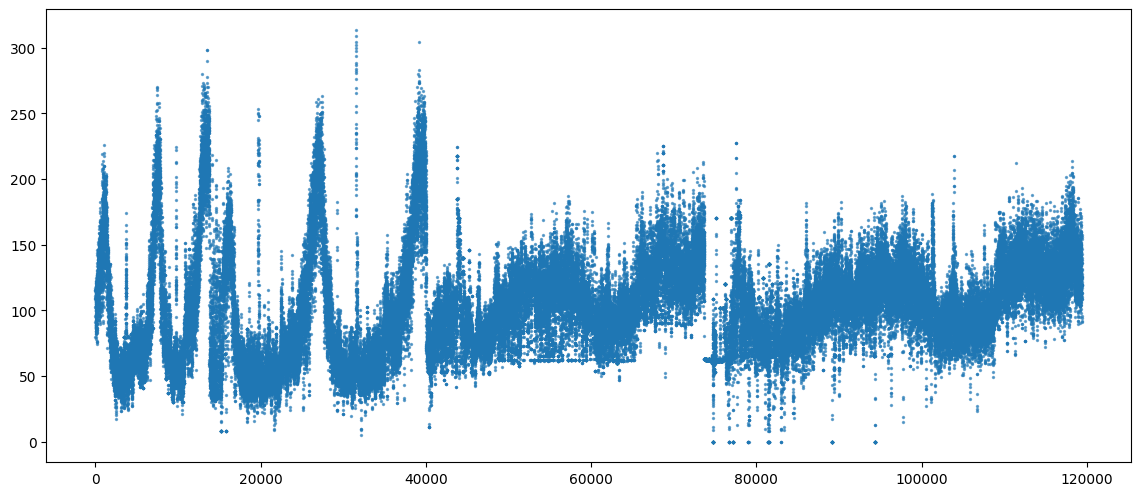

In [45]:
plt.figure(figsize=(14,6))
plt.scatter(mov_avg7.index, mov_avg7, s=2, alpha=0.6)

In [46]:
df = pd.DataFrame(mov_avg7)
    
split = 100000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

In [47]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/5
3125/3125 [==============================] - 15s 5ms/step - loss: 18.5342
Epoch 2/5
3125/3125 [==============================] - 14s 4ms/step - loss: 10.5070
Epoch 3/5
3125/3125 [==============================] - 14s 4ms/step - loss: 10.4700
Epoch 4/5
3125/3125 [==============================] - 14s 5ms/step - loss: 10.4724
Epoch 5/5
3125/3125 [==============================] - 15s 5ms/step - loss: 10.4819


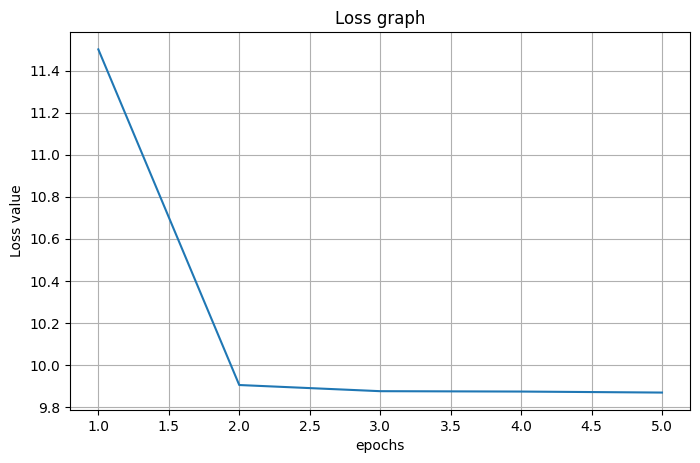

In [49]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=2)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 15s 4ms/step - loss: 10.4676
Epoch 2/2
3125/3125 [==============================] - 14s 4ms/step - loss: 10.4626


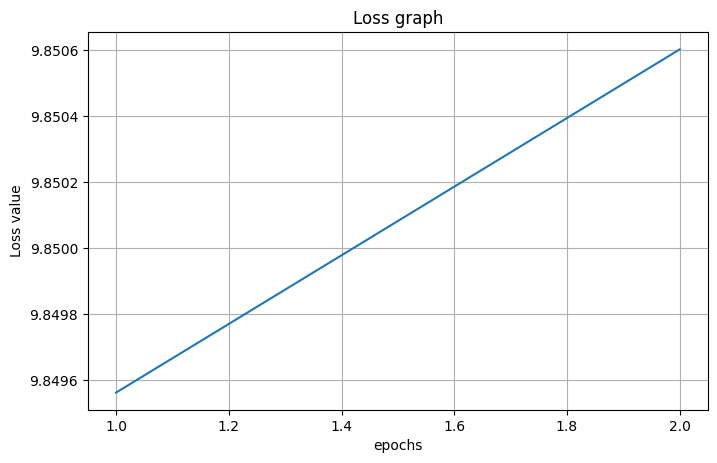

In [50]:

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-5))
history = model.fit(dataset, epochs=2)
plot_loss(history)

[105.05034 104.81887  87.26381 ... 130.09439 145.07643 131.22482]


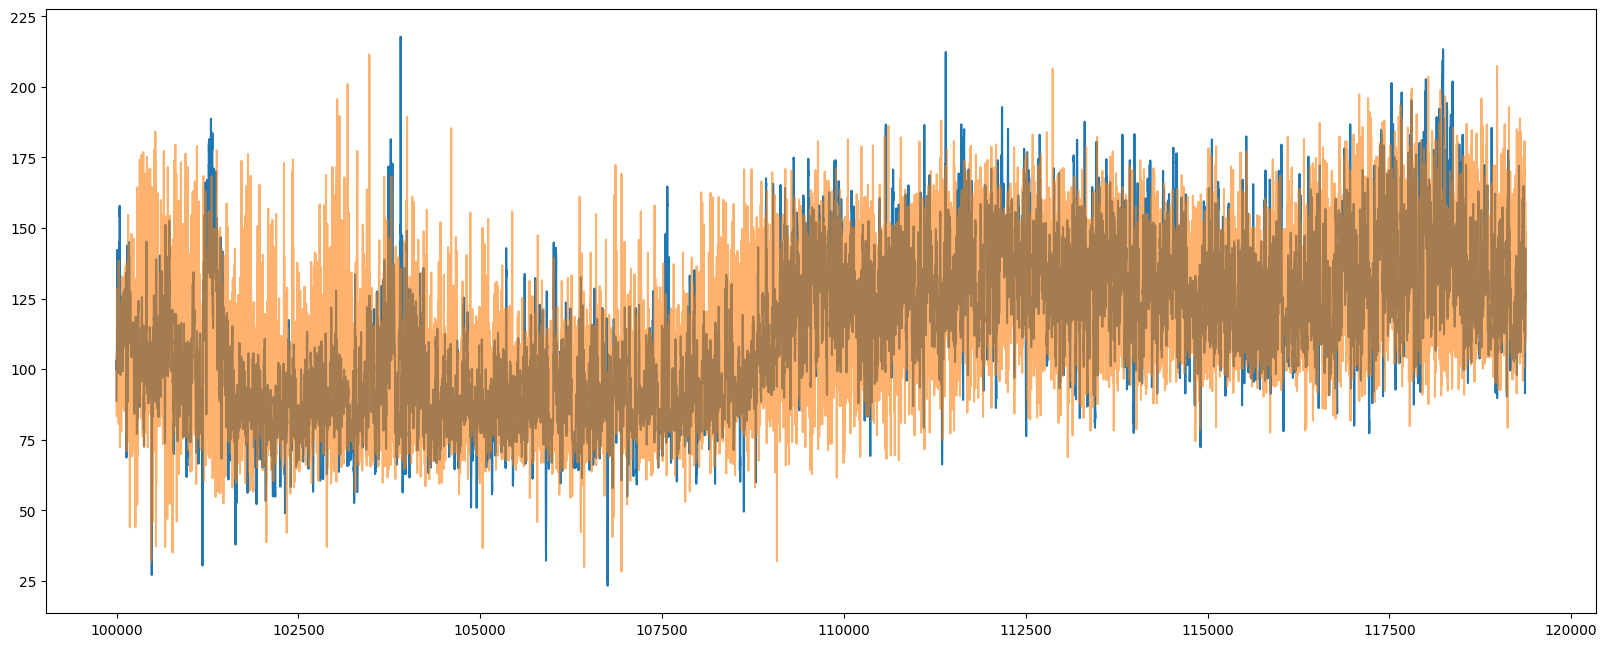

In [51]:
prediction = model.predict(valid_dataset)
print(prediction[:,0,0])

plt.figure(figsize=(20,8))
plt.plot(valid_time[:-window_size], valid_ADR[:-window_size])
plt.plot(valid_time[:-window_size], prediction[:,0,0], alpha=0.6)
plt.show()

### Average of predictions with sliding window of size: 2

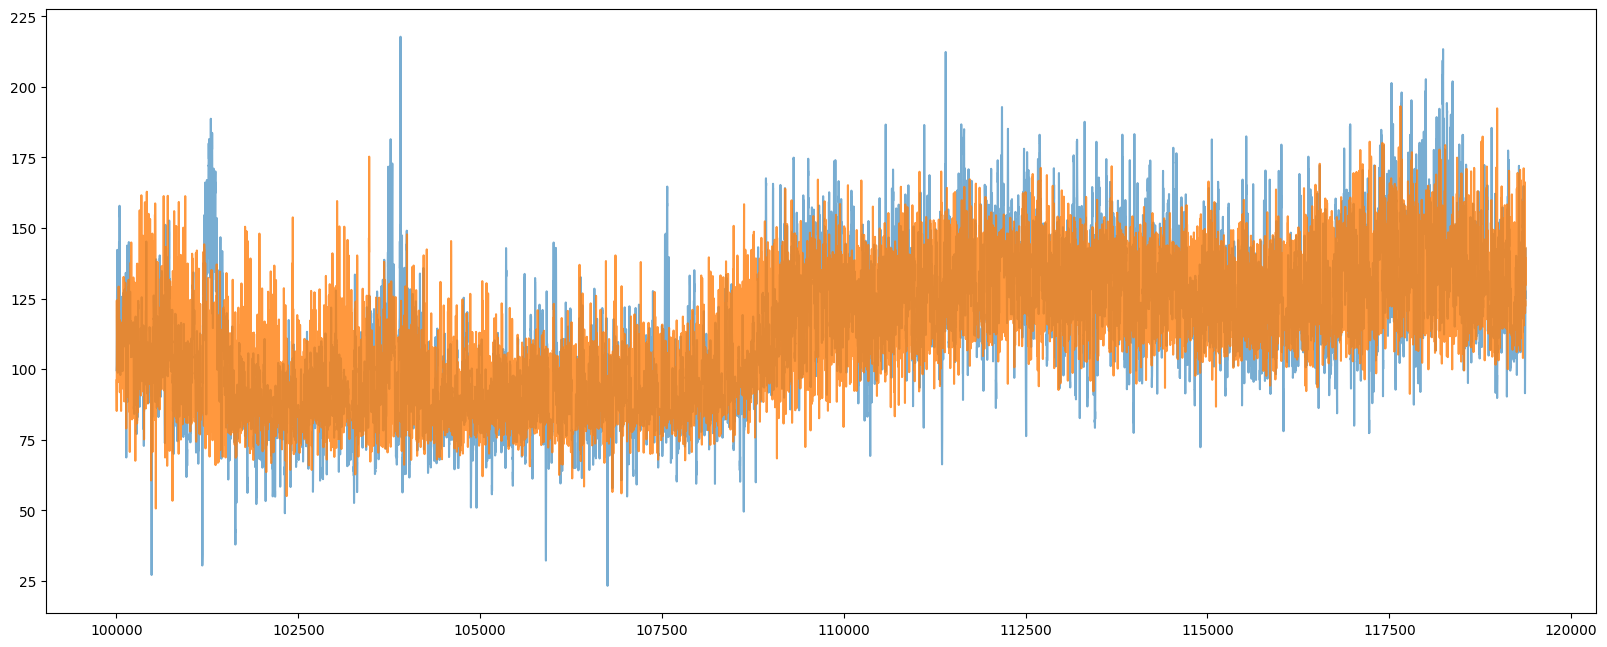

In [52]:
pred = pd.Series(prediction[:,0,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.show()

In [54]:
## Window size
print("Mean: ",(valid_ADR[2:-7].to_numpy() - pred_avg7).mean())
print("Median: ",(valid_ADR[2:-7].to_numpy() - pred_avg7).median())

Mean:  0.2422541770696398
Median:  -0.8625192260741983


### Residual Plot

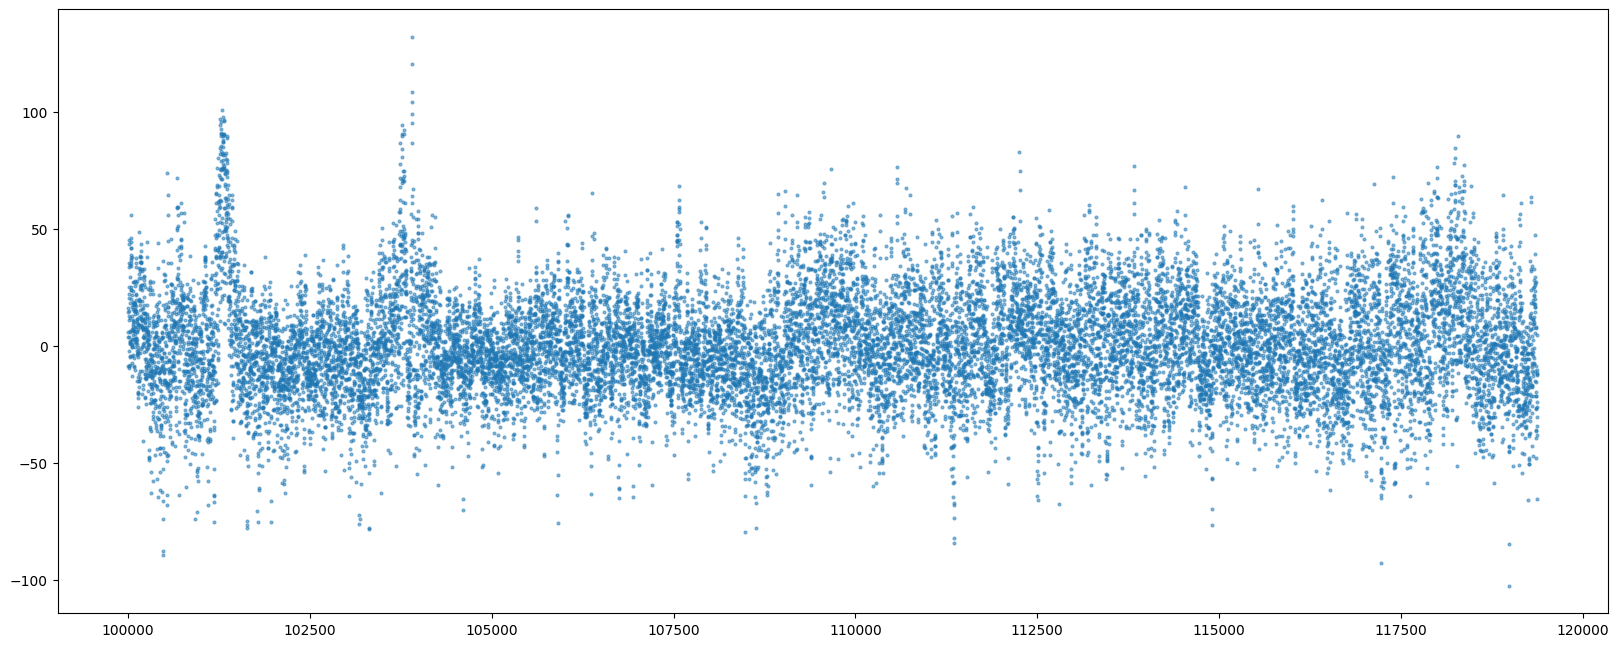

In [55]:
plt.figure(figsize=(20,8))
plt.scatter(valid_time[2:-7], (valid_ADR[2:-7].to_numpy() - pred_avg7), s=4, alpha=0.5)

In [56]:
model.save("Dnn")

INFO:tensorflow:Assets written to: Dnn\assets


#### Load the Pretrained Model

In [80]:
model = tf.keras.models.load_model('Dnn')

## 3. Sequential Model

### 3.1. Recurrent Neural Network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [58]:
data2 = pd.read_csv('hotel_bookings.csv')
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
mov_avg7 = sample_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

del data2
del sample_data

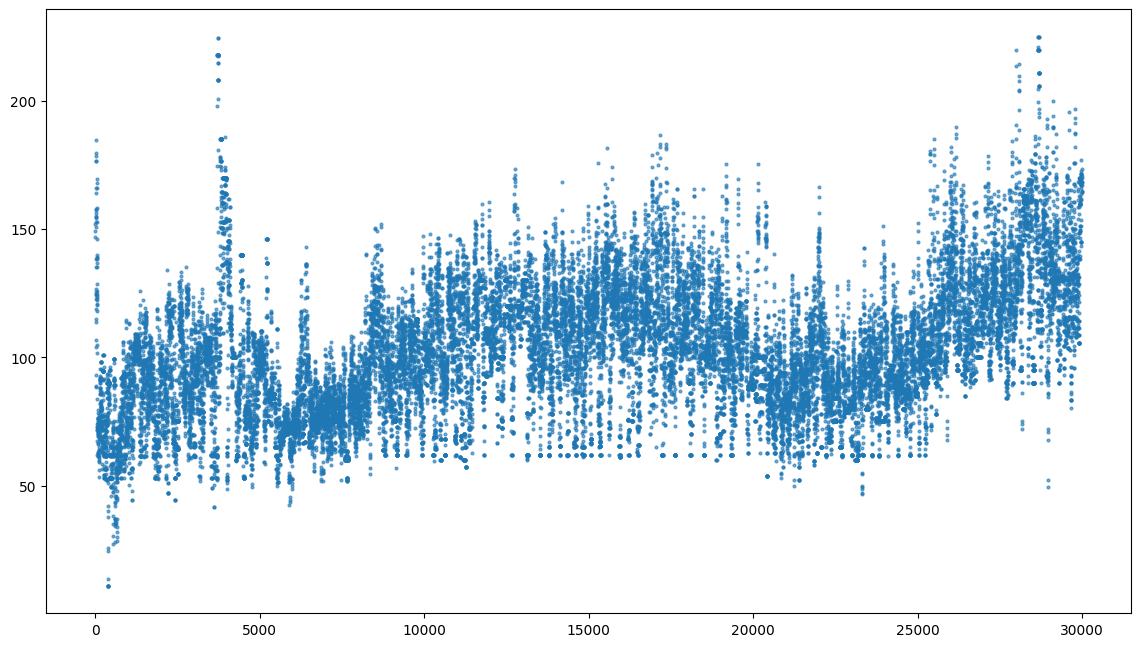

In [59]:
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

In [60]:
df = pd.DataFrame(mov_avg7)
del mov_avg7
split = 23000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

In [2]:
def plot_loss(history):
    epochs = range(1, (len(history.history["loss"])+1))
    losses = history.history["loss"]
    plt.figure(figsize=(8,5))
    plt.plot(epochs, losses)
    plt.title("Loss graph")
    plt.xlabel("epochs")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.show()

In [3]:
window_size = 7
batch_size = 32

def window_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [63]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/12
719/719 [==============================] - 19s 22ms/step - loss: 90.9278
Epoch 2/12
719/719 [==============================] - 16s 22ms/step - loss: 90.9389
Epoch 3/12
719/719 [==============================] - 16s 23ms/step - loss: 90.8036
Epoch 4/12
719/719 [==============================] - 16s 22ms/step - loss: 90.3997
Epoch 5/12
719/719 [==============================] - 17s 23ms/step - loss: 89.2432
Epoch 6/12
719/719 [==============================] - 16s 23ms/step - loss: 86.6426
Epoch 7/12
719/719 [==============================] - 16s 22ms/step - loss: 78.5491
Epoch 8/12
719/719 [==============================] - 16s 22ms/step - loss: 39.6294
Epoch 9/12
719/719 [==============================] - 16s 22ms/step - loss: 7.2914
Epoch 10/12
719/719 [==============================] - 16s 22ms/step - loss: 4.6698
Epoch 11/12
719/719 [==============================] - 16s 22ms/step - loss: 5.2061
Epoch 12/12
719/719 [==============================] - 16s 22ms/step - loss: 

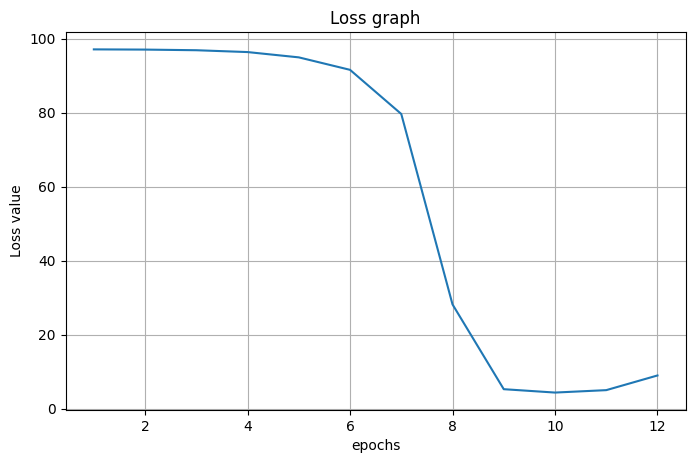

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-4))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)


(1e-08, 0.1, 3.0, 100.0)

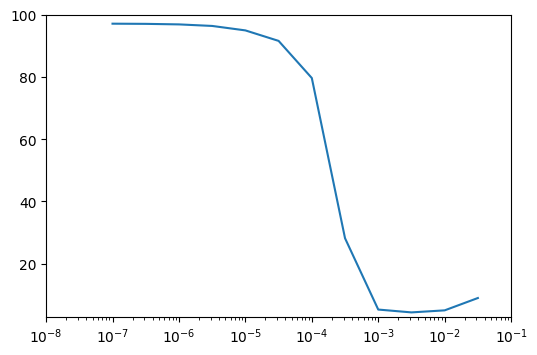

In [65]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,3, 100])

Epoch 1/5
719/719 [==============================] - 23s 27ms/step - loss: 48.2690
Epoch 2/5
719/719 [==============================] - 19s 27ms/step - loss: 14.0326
Epoch 3/5
719/719 [==============================] - 18s 25ms/step - loss: 3.7849 0s 
Epoch 4/5
719/719 [==============================] - 18s 25ms/step - loss: 3.5430
Epoch 5/5
719/719 [==============================] - 18s 25ms/step - loss: 3.4717


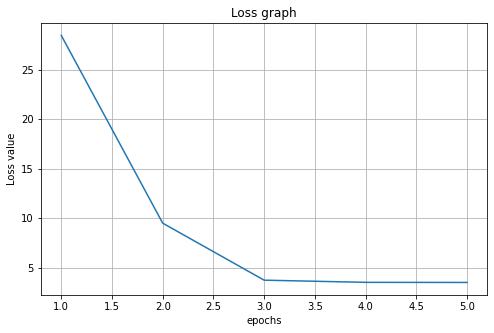

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-3))
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/3
719/719 [==============================] - 21s 25ms/step - loss: 3.2222
Epoch 2/3
719/719 [==============================] - 18s 25ms/step - loss: 3.1536 0s - loss: 3.
Epoch 3/3
719/719 [==============================] - 18s 25ms/step - loss: 3.1587


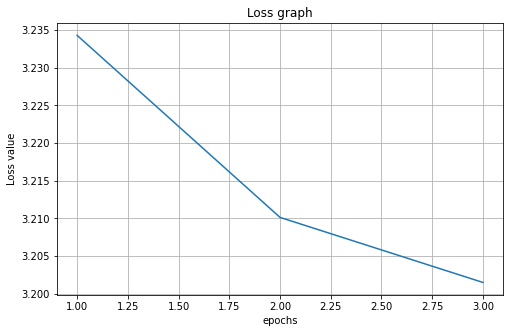

In [8]:
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=3)
plot_loss(history)

In [103]:
# tf.keras.backend.clear_session()
# model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam())
# history = model.fit(dataset, epochs=2)
# plot_loss(history)

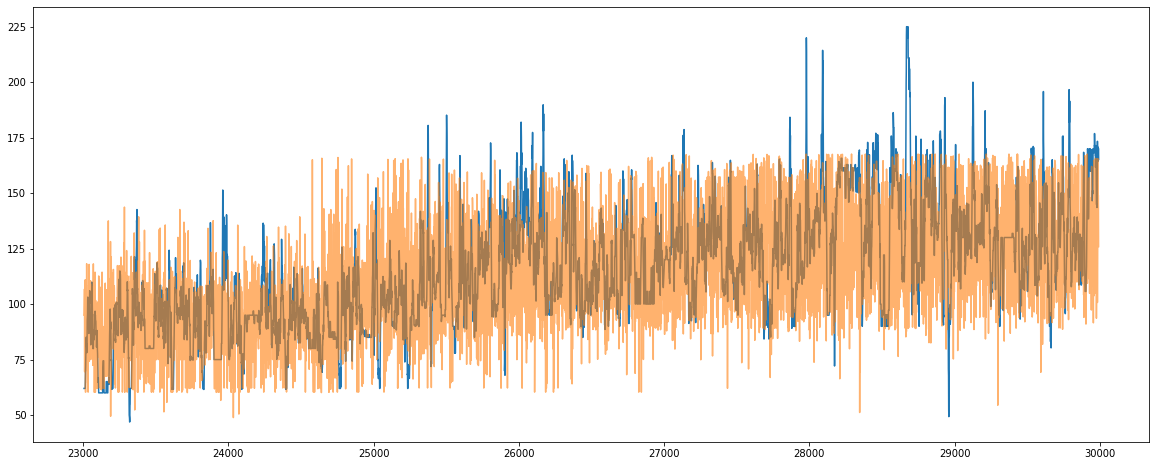

In [41]:
prediction = model.predict(valid_dataset)
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.6)
plt.show()

In [15]:
prediction[:,0].shape

(6986,)

In [13]:
valid_ADR[7:].shape

(6986,)

In [47]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}')

Mean Squared Error: 808.9922485351562
Mean Absolute Error: 22.198394775390625


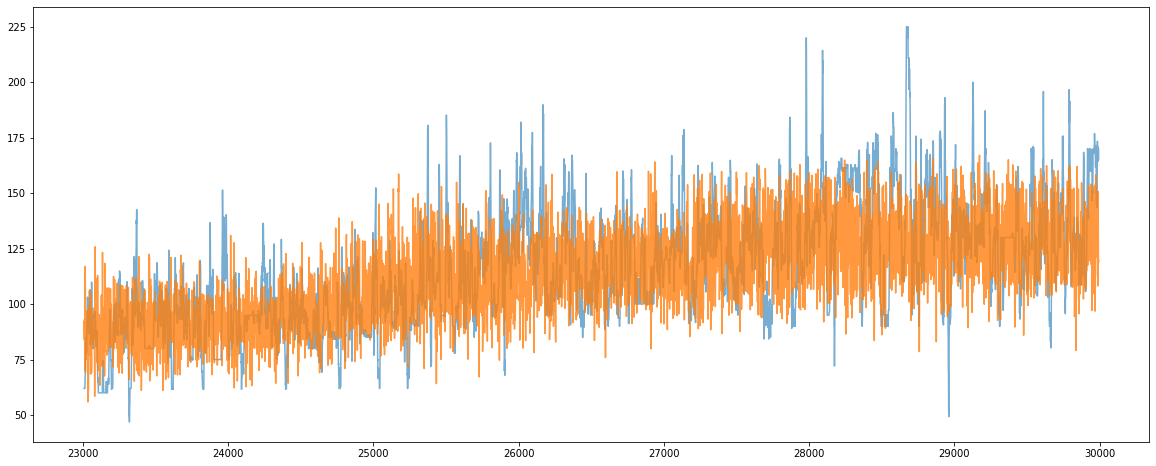

In [39]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[9:], valid_ADR[9:], alpha=0.6)
plt.plot(valid_time[9:], pred_avg7, alpha=0.8)
plt.show()

In [34]:
pred_avg7.shape

(6984,)

In [38]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}')

Mean Squared Error: 600.466401494776
Mean Absolute Error: 19.098429450492503


In [45]:
model.evaluate(valid_dataset)

219/219 [==============================] - 2s 7ms/step - loss: 4.4796


4.479644775390625

---

### With Complete Dataset (RNN)

In [66]:
## Complete Data

data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

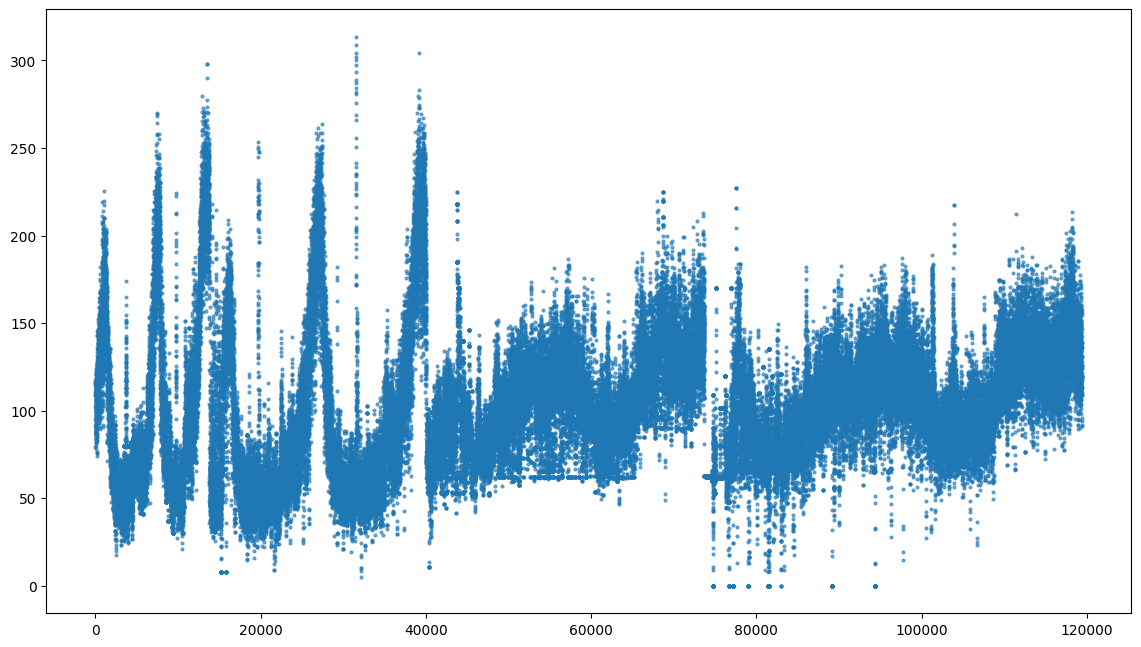

In [67]:
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

In [68]:
## Complete Data

df = pd.DataFrame(mov_avg7)
    
split = 100000  
series = df.adr
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

Epoch 1/2
3125/3125 [==============================] - 71s 22ms/step - loss: 30.8719
Epoch 2/2
3125/3125 [==============================] - 70s 22ms/step - loss: 4.6200


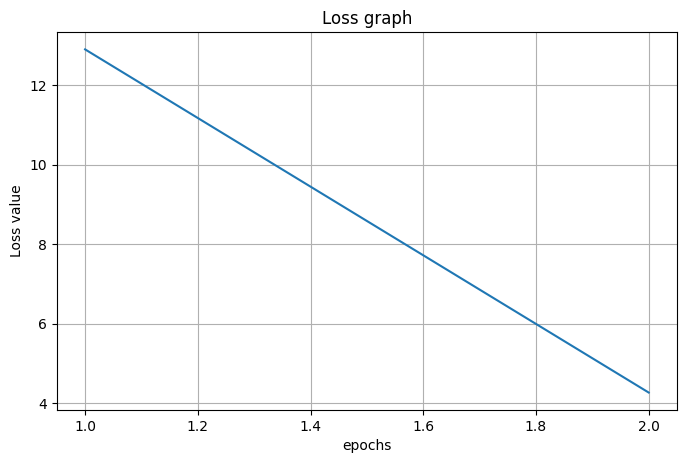

In [69]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-3))
history = model.fit(dataset, epochs=2)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 71s 22ms/step - loss: 4.2608
Epoch 2/2
3125/3125 [==============================] - 69s 22ms/step - loss: 4.2082


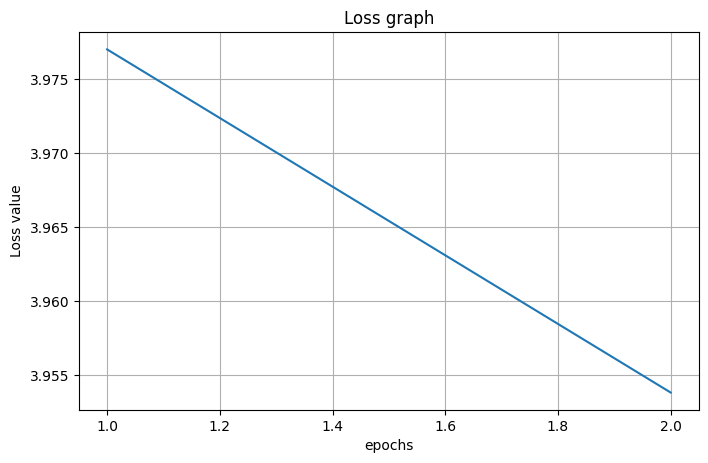

In [70]:
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=2)
plot_loss(history)

In [71]:
model.save("Rnn")

INFO:tensorflow:Assets written to: Rnn\assets


<br>

#### Prediction:

In [84]:
prediction = model.predict(valid_dataset)


Mean Squared Error: 669.349853515625
Mean Absolute Error: 19.88674545288086



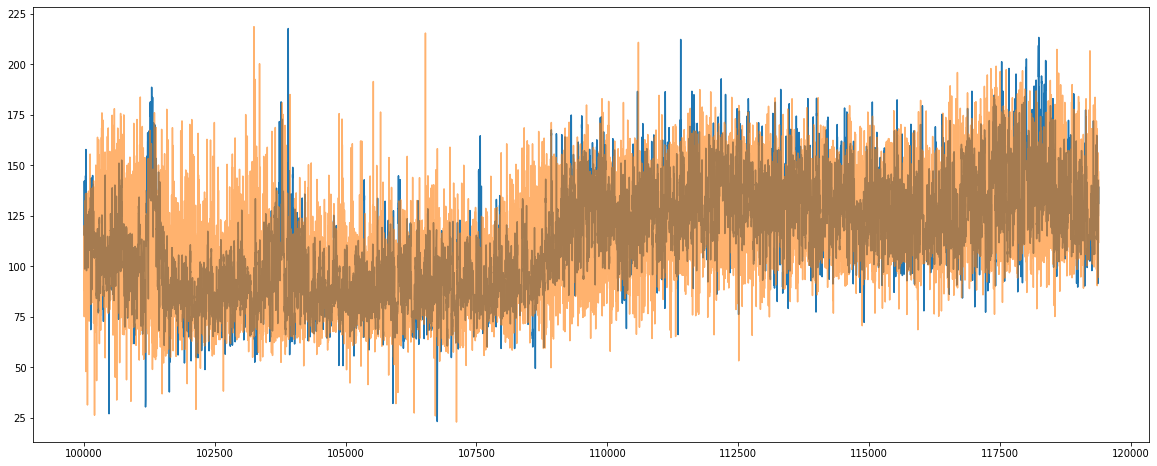

In [87]:
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[window_size:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[window_size:],prediction[:,0])}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.6)
plt.show()

<br>

#### Windowed Moving Average Smoothning for better Presentation
<br> <i>Window Size: 2</i>


Mean Squared Error: 503.2793697628985
Mean Absolute Error: 17.260976570030323



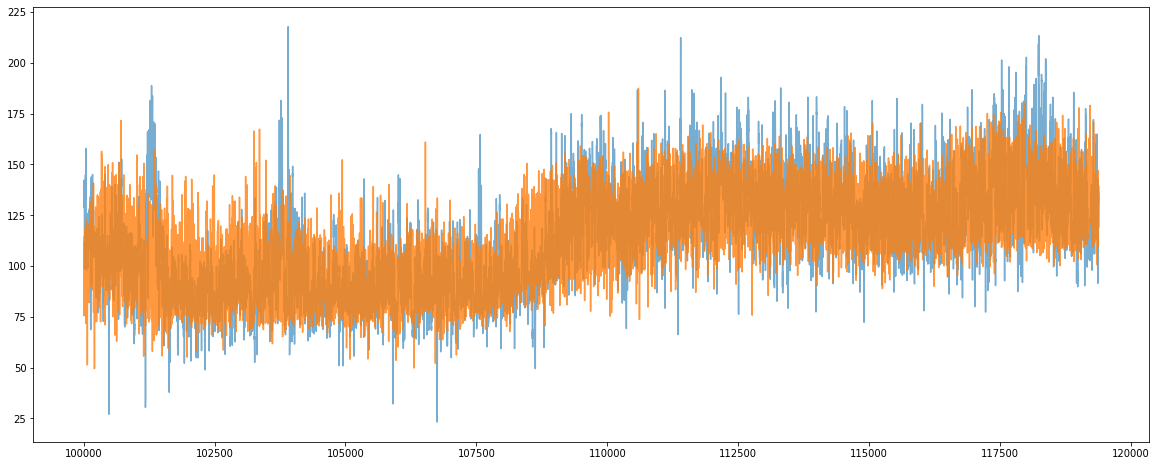

In [88]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size+2:], valid_ADR[window_size+2:], alpha=0.6)
plt.plot(valid_time[window_size+2:], pred_avg7, alpha=0.8)
plt.show()

In [89]:
model.evaluate(valid_dataset)

606/606 [==============================] - 4s 7ms/step - loss: 4.7291


4.729092597961426

---

### 3.2. LSTM Network

Epoch 1/12
3125/3125 [==============================] - 59s 15ms/step - loss: 95.9051
Epoch 2/12
3125/3125 [==============================] - 49s 16ms/step - loss: 95.8439
Epoch 3/12
3125/3125 [==============================] - 48s 15ms/step - loss: 95.6661
Epoch 4/12
3125/3125 [==============================] - 48s 15ms/step - loss: 94.8462
Epoch 5/12
3125/3125 [==============================] - 48s 15ms/step - loss: 89.7133
Epoch 6/12
3125/3125 [==============================] - 48s 15ms/step - loss: 75.4462
Epoch 7/12
3125/3125 [==============================] - 49s 15ms/step - loss: 38.4464
Epoch 8/12
3125/3125 [==============================] - 55s 17ms/step - loss: 8.5880
Epoch 9/12
3125/3125 [==============================] - 51s 16ms/step - loss: 5.1122
Epoch 10/12
3125/3125 [==============================] - 54s 17ms/step - loss: 5.2250
Epoch 11/12
3125/3125 [==============================] - 53s 17ms/step - loss: 6.0459
Epoch 12/12
3125/3125 [==============================] -

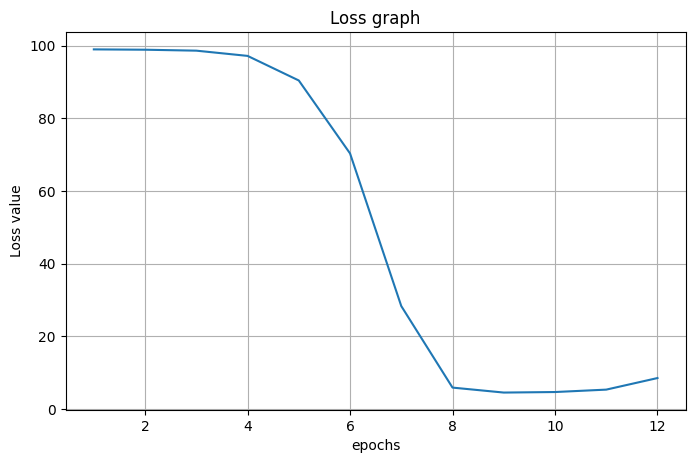

In [132]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-4))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)

(1e-08, 0.1, 3.0, 100.0)

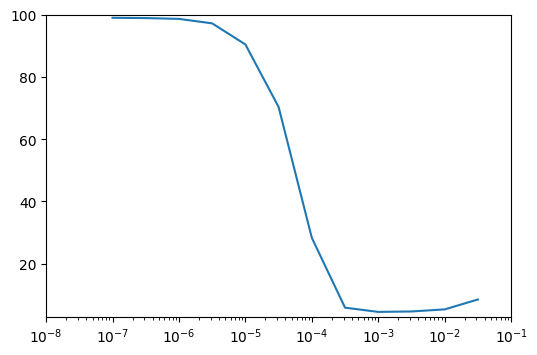

In [133]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,3, 100])

Epoch 1/5
719/719 [==============================] - 30s 19ms/step - loss: 59.1074
Epoch 2/5
719/719 [==============================] - 14s 19ms/step - loss: 12.7796
Epoch 3/5
719/719 [==============================] - 14s 20ms/step - loss: 3.9041 0s - loss: 3.
Epoch 4/5
719/719 [==============================] - 14s 20ms/step - loss: 3.4310
Epoch 5/5
719/719 [==============================] - 14s 19ms/step - loss: 3.3495


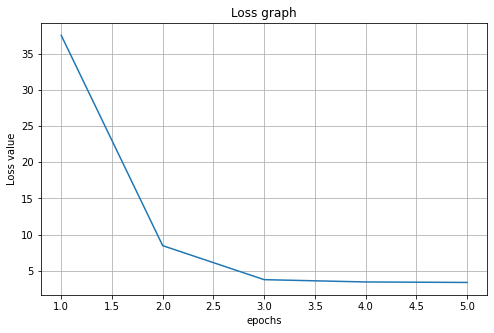

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/5
719/719 [==============================] - 27s 19ms/step - loss: 3.1765
Epoch 2/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1394
Epoch 3/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1017
Epoch 4/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1008
Epoch 5/5
719/719 [==============================] - 14s 19ms/step - loss: 3.1220


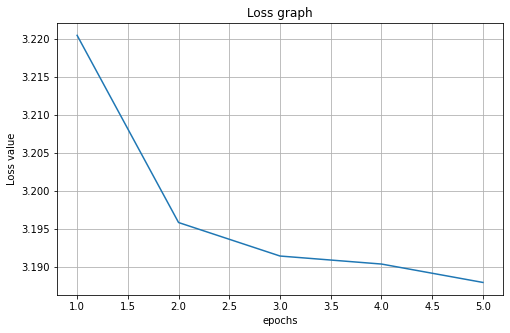

In [49]:
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(lr=5e-5))
history = model.fit(dataset, epochs=5)
plot_loss(history)

In [50]:
prediction = model.predict(valid_dataset)

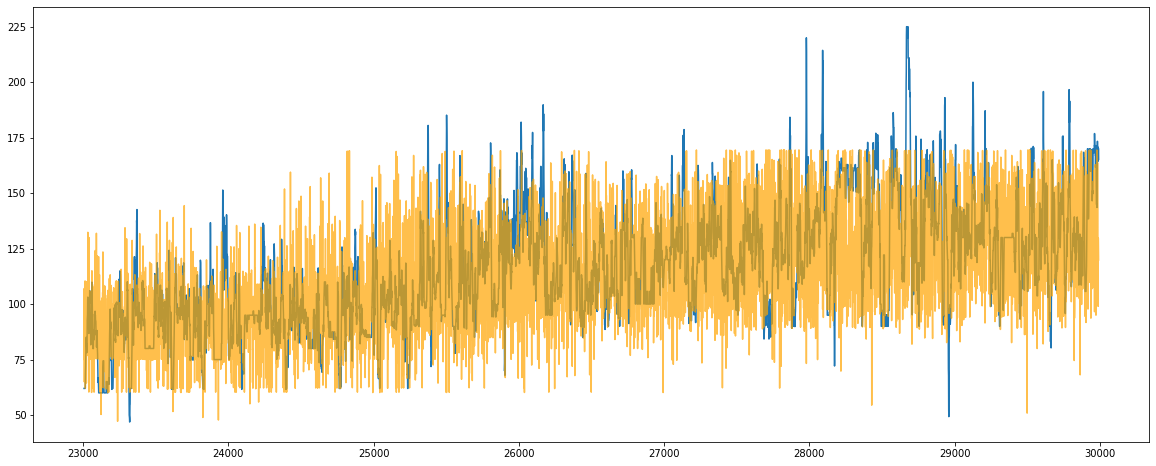

In [63]:
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.7, c='orange')
plt.show()

In [64]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}')

Mean Squared Error: 800.5513916015625
Mean Absolute Error: 22.27399253845215


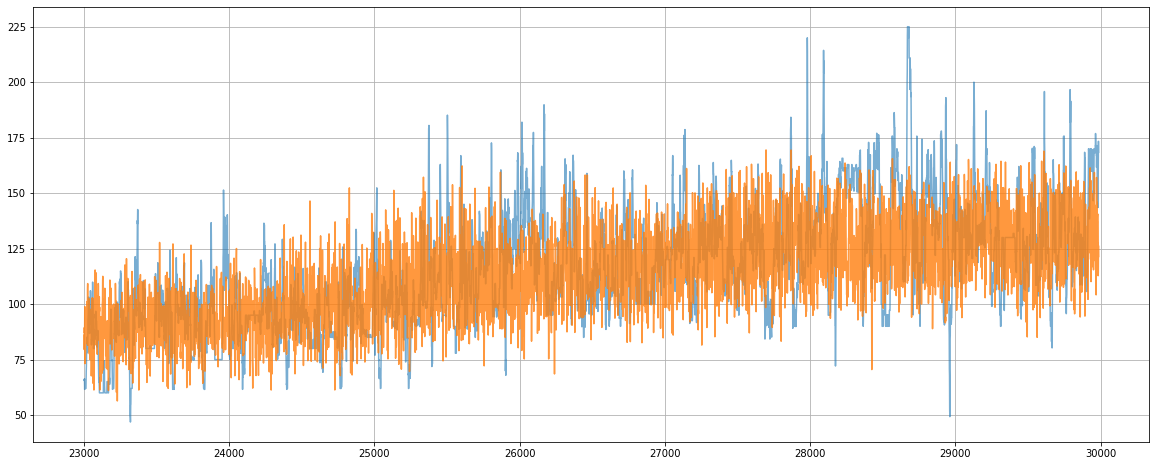

In [65]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.grid()
plt.show()

In [67]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}')

Mean Squared Error: 620.2124039897992
Mean Absolute Error: 19.454777264299302


In [68]:
model.evaluate(valid_dataset)

219/219 [==============================] - 5s 8ms/step - loss: 4.4350


4.434974670410156

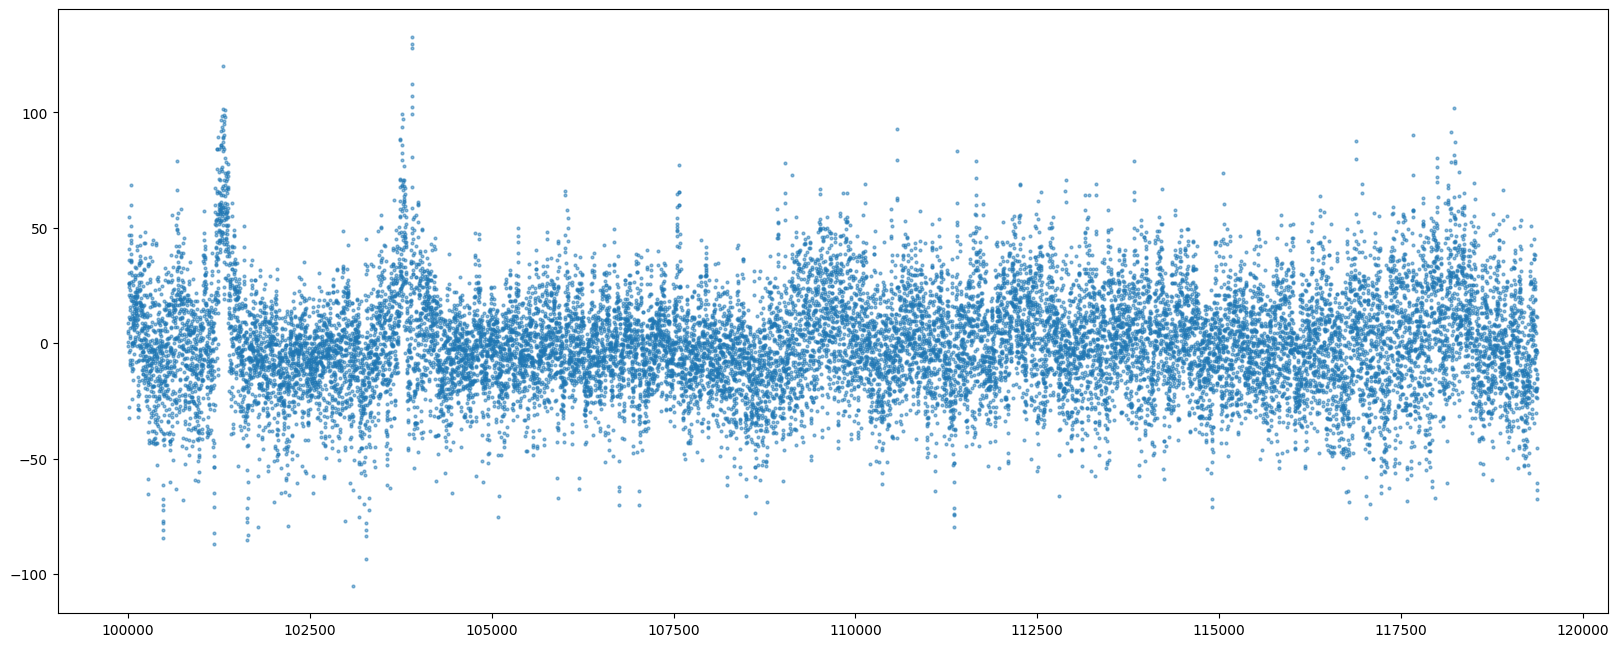

In [144]:
plt.figure(figsize=(20,8))
plt.scatter(valid_time[2:-7], (valid_ADR[2:-7].to_numpy() - pred_avg7), s=4, alpha=0.5)

---

### With Complete Dataset (LSTM)

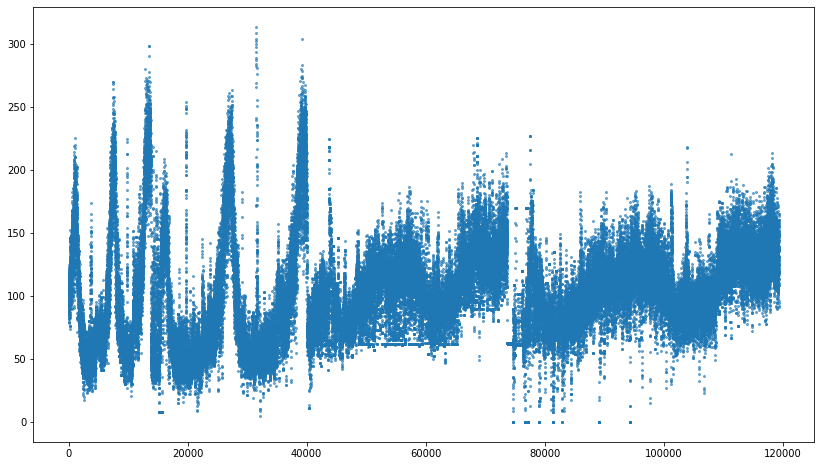

In [4]:
## Complete Data

data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

Epoch 1/3
3125/3125 [==============================] - 63s 15ms/step - loss: 40.2998
Epoch 2/3
3125/3125 [==============================] - 48s 15ms/step - loss: 4.9985
Epoch 3/3
3125/3125 [==============================] - 48s 15ms/step - loss: 4.4886 0s - loss: 4.48


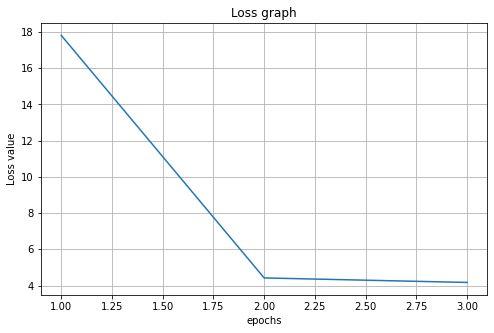

In [5]:
df = pd.DataFrame(mov_avg7)
del mov_avg7
    
split = 100000  
series = df.adr
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=3)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 59s 16ms/step - loss: 4.2694
Epoch 2/2
3125/3125 [==============================] - 48s 15ms/step - loss: 4.2151


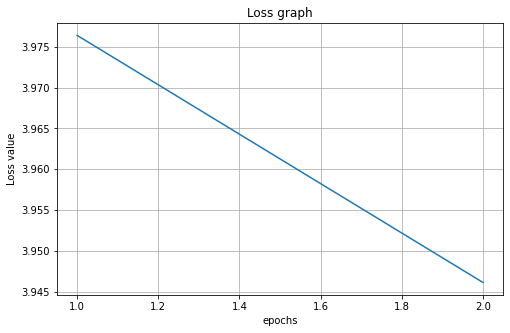

In [6]:
# Fine Tuning with reduced learning rate
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=5e-5))
history = model.fit(dataset, epochs=2)
plot_loss(history)

In [7]:
model.save("lstm")

INFO:tensorflow:Assets written to: lstm\assets


INFO:tensorflow:Assets written to: lstm\assets


In [9]:
model = tf.keras.models.load_model("lstm")

#### Prediction


Mean Squared Error: 667.7177124023438
Mean Absolute Error: 19.89810562133789



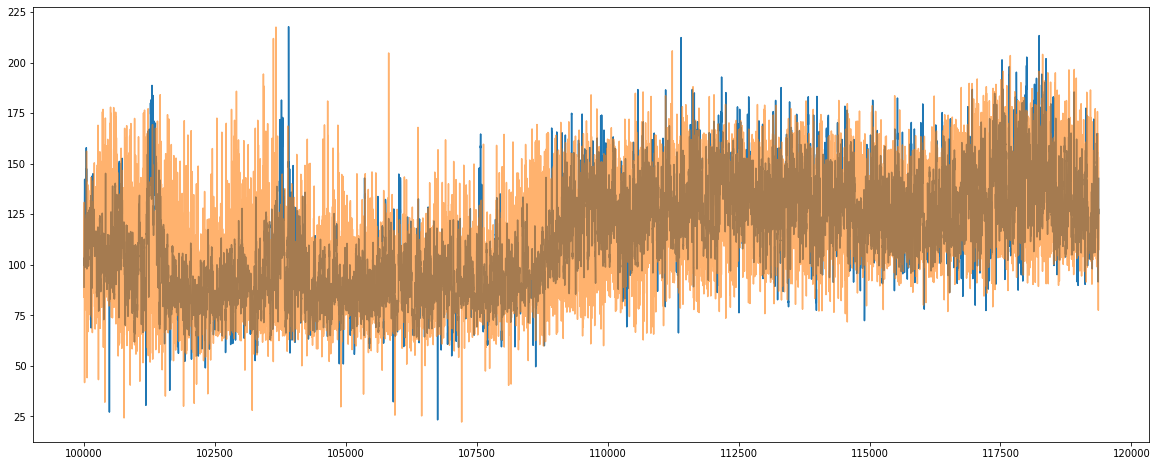

In [10]:
prediction = model.predict(valid_dataset)
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[:-window_size], valid_ADR[:-window_size])
plt.plot(valid_time[:-window_size], prediction[:,0], alpha=0.6)
plt.show()


Mean Squared Error: 503.4578912151312
Mean Absolute Error: 17.31023472531158



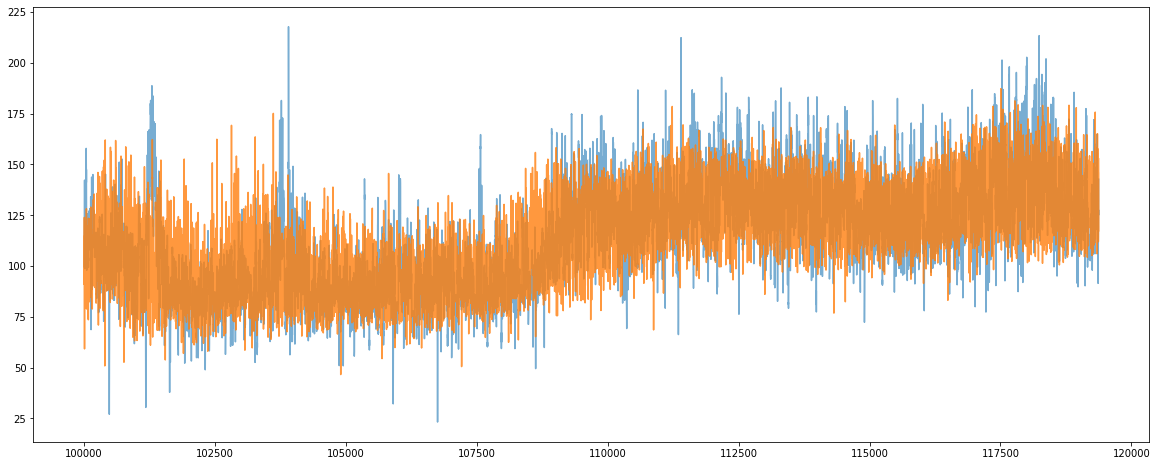

In [11]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.show()

In [12]:
model.evaluate(valid_dataset)

606/606 [==============================] - 6s 7ms/step - loss: 4.6761


4.676113128662109

---

### 3.3 Conv + LSTM

Epoch 1/16
719/719 [==============================] - 16s 12ms/step - loss: 91.2506 - mae: 91.7506
Epoch 2/16
719/719 [==============================] - 9s 12ms/step - loss: 91.1980 - mae: 91.6980
Epoch 3/16
719/719 [==============================] - 9s 12ms/step - loss: 91.2021 - mae: 91.7021
Epoch 4/16
719/719 [==============================] - 9s 12ms/step - loss: 91.1695 - mae: 91.6695
Epoch 5/16
719/719 [==============================] - 9s 12ms/step - loss: 91.1742 - mae: 91.6742
Epoch 6/16
719/719 [==============================] - 9s 12ms/step - loss: 90.7372 - mae: 91.2372
Epoch 7/16
719/719 [==============================] - 9s 12ms/step - loss: 89.3910 - mae: 89.8910
Epoch 8/16
719/719 [==============================] - 9s 12ms/step - loss: 83.7237 - mae: 84.2237
Epoch 9/16
719/719 [==============================] - 9s 13ms/step - loss: 76.8613 - mae: 77.3613
Epoch 10/16
719/719 [==============================] - 9s 13ms/step - loss: 67.6909 - mae: 68.1909
Epoch 11/16
719/71

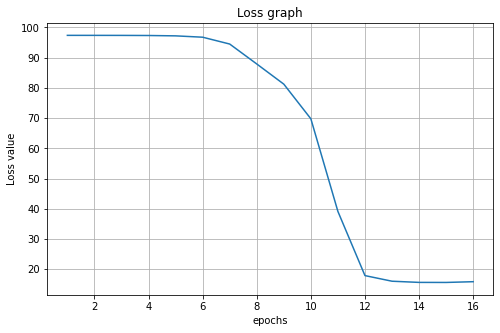

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 2))
optimizer = tf.keras.optimizers.Adam(lr=1e-8)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=16, callbacks=[lr_schedule])
plot_loss(history)

(1e-08, 0.1, 3.0, 100.0)

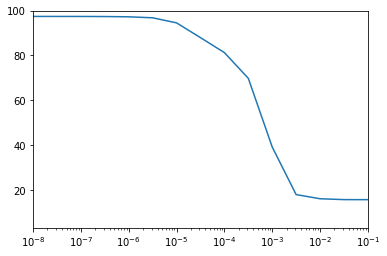

In [20]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,3, 100])

Epoch 1/5
719/719 [==============================] - 23s 16ms/step - loss: 30.5004
Epoch 2/5
719/719 [==============================] - 11s 16ms/step - loss: 4.2893
Epoch 3/5
719/719 [==============================] - 12s 17ms/step - loss: 3.6404
Epoch 4/5
719/719 [==============================] - 12s 16ms/step - loss: 3.5156
Epoch 5/5
719/719 [==============================] - 12s 16ms/step - loss: 3.5104


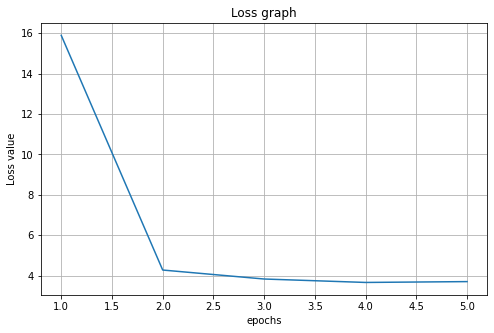

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer)
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/5
719/719 [==============================] - 22s 16ms/step - loss: 3.0712
Epoch 2/5
719/719 [==============================] - 12s 16ms/step - loss: 3.0560
Epoch 3/5
719/719 [==============================] - 12s 17ms/step - loss: 3.0208
Epoch 4/5
719/719 [==============================] - 12s 17ms/step - loss: 3.0185
Epoch 5/5
719/719 [==============================] - 12s 17ms/step - loss: 2.9996


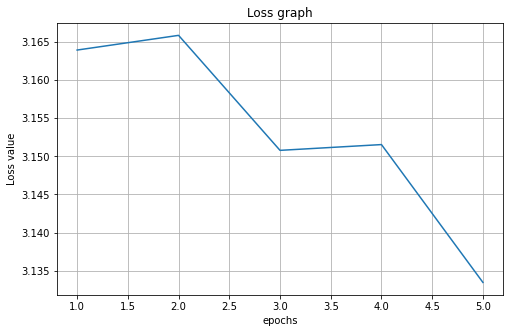

In [26]:
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=5)
plot_loss(history)

In [27]:
prediction = model.predict(valid_dataset)

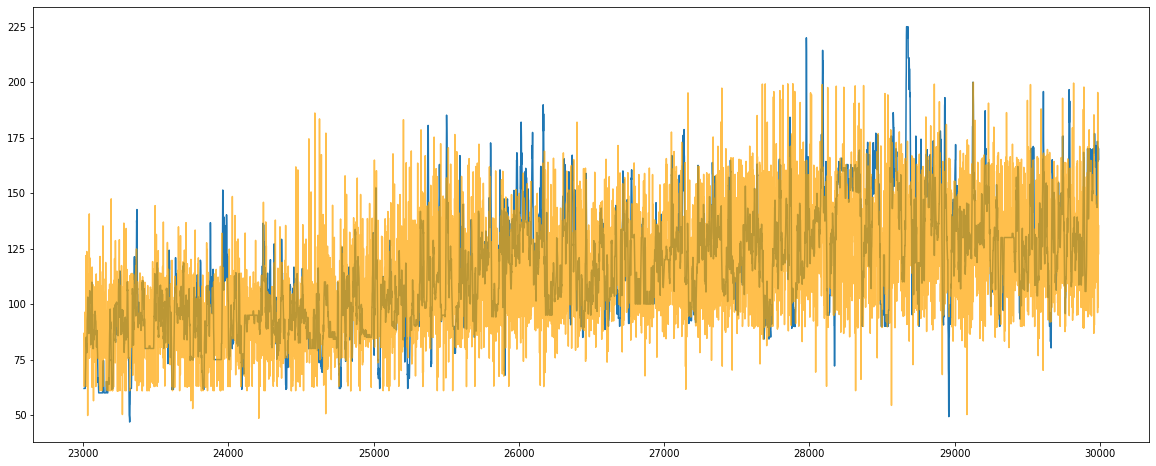

In [28]:
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.7, c='orange')
plt.show()

In [29]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}')

Mean Squared Error: 813.8180541992188
Mean Absolute Error: 22.239715576171875


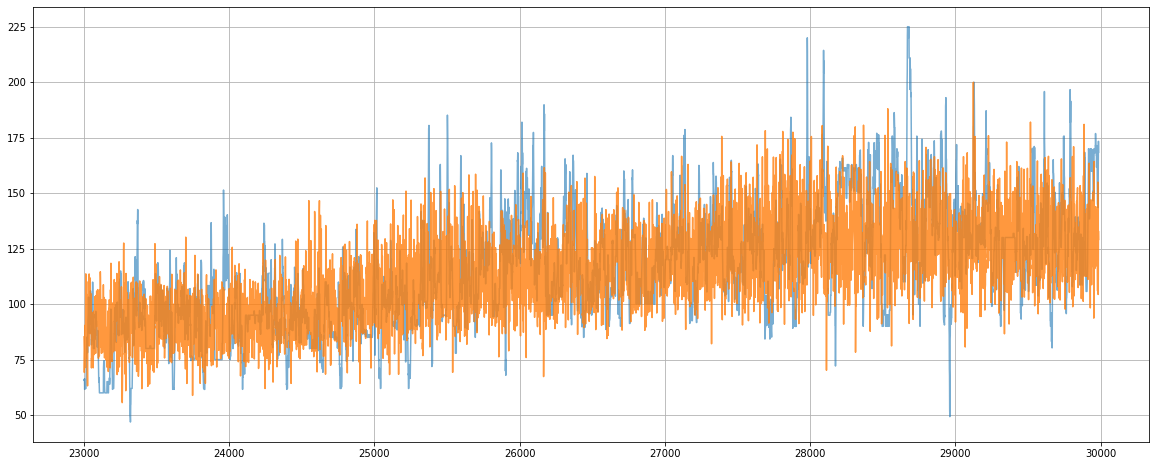

In [30]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.grid()
plt.show()

In [31]:
model.evaluate(valid_dataset)

219/219 [==============================] - 4s 7ms/step - loss: 3.9252


3.925184726715088

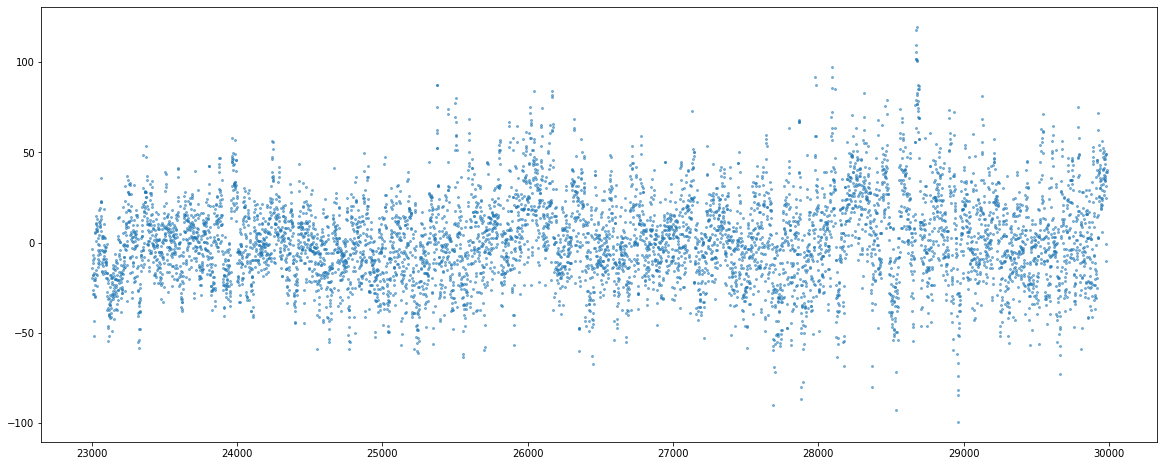

In [32]:
plt.figure(figsize=(20,8))
plt.scatter(valid_time[2:-7], (valid_ADR[2:-7].to_numpy() - pred_avg7), s=4, alpha=0.5)

---
### With Complete Dataset

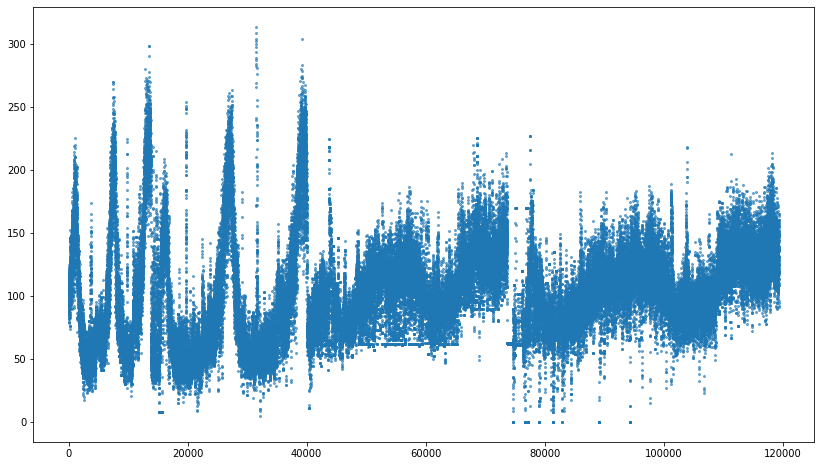

In [37]:
## Complete Data

data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

Epoch 1/3
3125/3125 [==============================] - 62s 16ms/step - loss: 17.9129
Epoch 2/3
3125/3125 [==============================] - 51s 16ms/step - loss: 4.8776
Epoch 3/3
3125/3125 [==============================] - 51s 16ms/step - loss: 4.7450


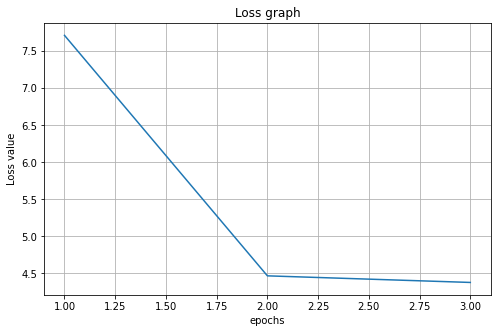

In [38]:
df = pd.DataFrame(mov_avg7)
del mov_avg7
    
split = 100000  
series = df.adr
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu"),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-3))
history = model.fit(dataset, epochs=3)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 63s 16ms/step - loss: 4.2480
Epoch 2/2
3125/3125 [==============================] - 55s 18ms/step - loss: 4.2150


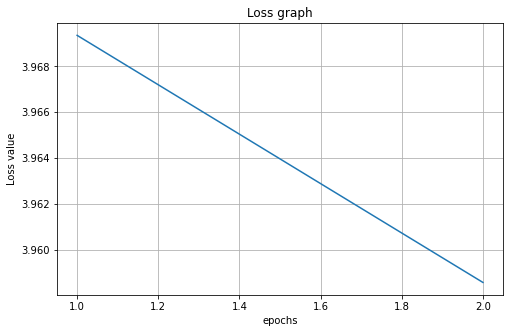

In [39]:
# Fine Tuning with reduced learning rate
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=2)
plot_loss(history)

#### Prediction


Mean Squared Error: 658.3031616210938
Mean Absolute Error: 19.715673446655273



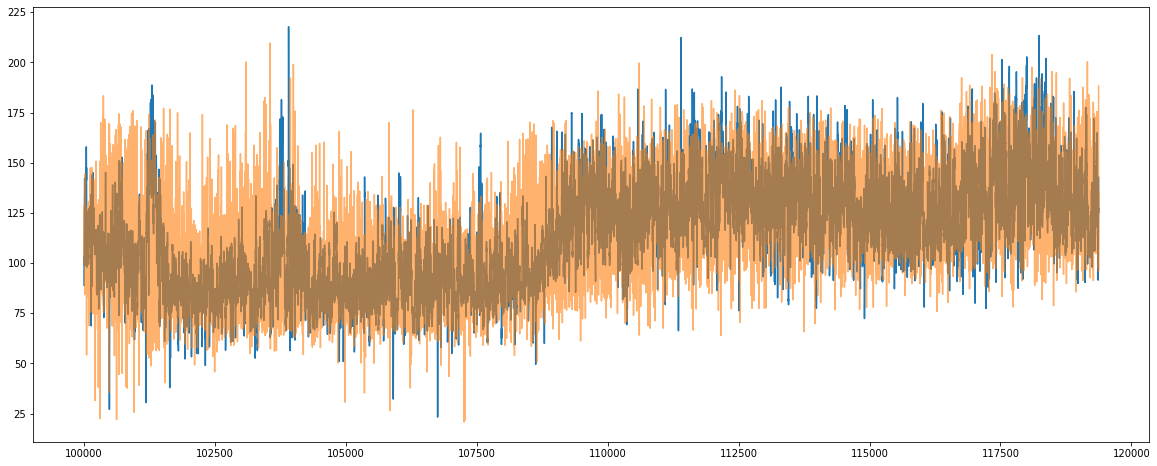

In [40]:
prediction = model.predict(valid_dataset)
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[:-window_size], valid_ADR[:-window_size])
plt.plot(valid_time[:-window_size], prediction[:,0], alpha=0.6)
plt.show()


Mean Squared Error: 497.7122357887354
Mean Absolute Error: 17.158698325296935



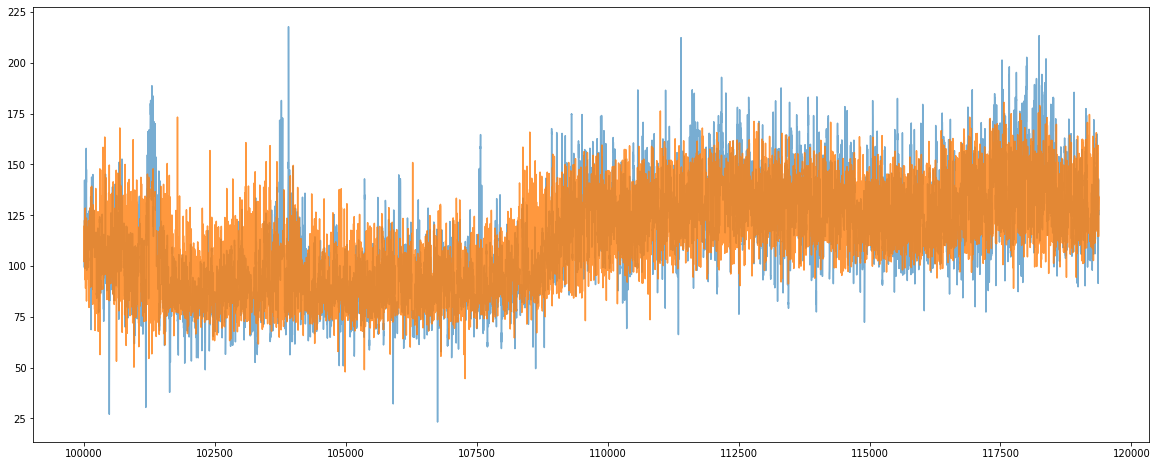

In [41]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.show()

In [42]:
model.evaluate(valid_dataset)

606/606 [==============================] - 7s 7ms/step - loss: 4.7544


4.754359245300293

In [43]:
model.save("conv-lstm")

INFO:tensorflow:Assets written to: conv-lstm\assets


INFO:tensorflow:Assets written to: conv-lstm\assets


In [1]:
import tensorflow as tf
model = tf.keras.models.load_model("conv-lstm")

In [2]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, None, 1)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, None, 32)          192       
_________________________________________________________________
bidirectional_31 (Bidirectio (None, None, 64)          16640     
_________________________________________________________________
bidirectional_32 (Bidirectio (None, None, 64)          24832     
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)               

---
---